The goal of this project is to predict the winner of a English Premier League match using machine learning. In a previous project, we web-scrapped the relevant data for EPL matches. The project can be found [here](https://apurba-saha.github.io/web-scrapping-data-for-english-premier-league-football-matches). The web-scrapped data was saved into a file named "matches.csv". We directly use this file to import the data and build a machine learning model to predict the winner of a match.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
match_df = pd.read_csv("matches.csv", index_col=0)

# Exploratory Data Analysis

In [4]:
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16.0,4.0,18.5,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25.0,10.0,14.8,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25.0,8.0,14.3,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16.0,1.0,16.4,1.0,0.0,0.0,2022,Manchester City


In [5]:
match_df.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
36,2018-04-14,15:00,Premier League,Matchweek 34,Sat,Away,L,0,1,Huddersfield,...,Match Report,NaN,4.0,2.0,18.9,NaN,0.0,0.0,2018,Norwich City
37,2018-04-21,15:00,Premier League,Matchweek 35,Sat,Home,D,0,0,Crystal Palace,...,Match Report,NaN,14.0,4.0,17.5,NaN,0.0,0.0,2018,Norwich City
38,2018-04-30,20:00,Premier League,Matchweek 36,Mon,Away,L,0,2,Tottenham,...,Match Report,NaN,13.0,5.0,15.2,NaN,0.0,0.0,2018,Norwich City
39,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,2,1,Newcastle Utd,...,Match Report,NaN,10.0,7.0,15.7,NaN,0.0,1.0,2018,Norwich City
40,2018-05-13,15:00,Premier League,Matchweek 38,Sun,Away,L,0,1,Manchester Utd,...,Match Report,NaN,7.0,3.0,16.3,NaN,0.0,0.0,2018,Norwich City


In [6]:
match_df.shape

(3458, 27)

As we can notice, the index labels are not correct. Currently, it represents the match number of each season. We are not interested in that. So, we reset the index and drop the exiting column 0 which was infered as index column while reading data.

In [7]:
match_df.reset_index(drop=True, inplace=True)

In [8]:
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16.0,4.0,18.5,1.0,0.0,0.0,2022,Manchester City
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25.0,10.0,14.8,0.0,0.0,0.0,2022,Manchester City
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25.0,8.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16.0,1.0,16.4,1.0,0.0,0.0,2022,Manchester City


In [9]:
match_df.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
3453,2018-04-14,15:00,Premier League,Matchweek 34,Sat,Away,L,0,1,Huddersfield,...,Match Report,NaN,4.0,2.0,18.9,NaN,0.0,0.0,2018,Norwich City
3454,2018-04-21,15:00,Premier League,Matchweek 35,Sat,Home,D,0,0,Crystal Palace,...,Match Report,NaN,14.0,4.0,17.5,NaN,0.0,0.0,2018,Norwich City
3455,2018-04-30,20:00,Premier League,Matchweek 36,Mon,Away,L,0,2,Tottenham,...,Match Report,NaN,13.0,5.0,15.2,NaN,0.0,0.0,2018,Norwich City
3456,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,2,1,Newcastle Utd,...,Match Report,NaN,10.0,7.0,15.7,NaN,0.0,1.0,2018,Norwich City
3457,2018-05-13,15:00,Premier League,Matchweek 38,Sun,Away,L,0,1,Manchester Utd,...,Match Report,NaN,7.0,3.0,16.3,NaN,0.0,0.0,2018,Norwich City


As our goal is to make prediction for winners, we enough data for each time. It is not the case that the same 20 teams contest with each other in every season. It operates on a system of promotion and relegation with the English Football League (EFL). However, in this project, we only want to make predictions for those teams, which regularly participate in each season. For these teams, we will have enough data to make accurate prediction 

In [10]:
match_df.groupby(["team", "season"])["date"].count().unstack()

season,2018,2019,2020,2021,2022
team,,,,,
Arsenal,38.0,38.0,38.0,38.0,38.0
Aston Villa,38.0,NaN,38.0,38.0,38.0
Brentford,38.0,NaN,NaN,NaN,38.0
Brighton,38.0,38.0,38.0,38.0,38.0
Burnley,38.0,38.0,38.0,38.0,38.0
Chelsea,38.0,38.0,38.0,38.0,38.0
Crystal Palace,38.0,38.0,38.0,38.0,38.0
Everton,38.0,38.0,38.0,38.0,38.0
Leeds United,38.0,NaN,NaN,38.0,38.0


As we can observe, there are 5 teams in these dataset, who didn't play each season. We can delete the data for these teams from our dataset.

In [11]:
all_season_teams = match_df.groupby(["team", "season"])["date"].count().unstack().dropna().index.to_list()
all_season_teams.remove('Wolves')

In [12]:
match_df = match_df[match_df["team"].isin(all_season_teams) & match_df["opponent"].isin(all_season_teams)]

In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3380
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1820 non-null   object 
 1   time          1820 non-null   object 
 2   comp          1820 non-null   object 
 3   round         1820 non-null   object 
 4   day           1820 non-null   object 
 5   venue         1820 non-null   object 
 6   result        1820 non-null   object 
 7   gf            1820 non-null   int64  
 8   ga            1820 non-null   int64  
 9   opponent      1820 non-null   object 
 10  xg            1820 non-null   float64
 11  xga           1820 non-null   float64
 12  poss          1820 non-null   float64
 13  attendance    1406 non-null   float64
 14  captain       1820 non-null   object 
 15  formation     1820 non-null   object 
 16  referee       1820 non-null   object 
 17  match report  1820 non-null   object 
 18  notes         0 non-null    

As we can observe, there are some missing values for four columns: attendance, notes, dist, fk. The column 'notes' has no values in it. We can safely drop this column. For other columns, we need to take a more deep look to handle the missing data. Moreover, the datatype of 'date' column needs to be converted to a datetime object. The format of values in the 'time' column needs to be corrected. 

In [14]:
match_df.drop('notes', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
match_df['hour'] = match_df['time'].str.replace(r':.+', "", regex=True).astype(int)
match_df.drop('time', axis=1, inplace=True)

<ipython-input-15-88fa29fedc93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['hour'] = match_df['time'].str.replace(r':.+', "", regex=True).astype(int)


In [16]:
match_df['date'] = pd.to_datetime(match_df['date'])

<ipython-input-16-1ebb7af4446e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['date'] = pd.to_datetime(match_df['date'])


Now let's analyze the missing data. As we observed during the exploratory data analysis, there are some missing values for three columns: attendance, dist, fk. As only one data is missing from the 'dist' column, it is probably missing completely at random. As the 'dist' column had some outliers, we can replace the missing value with the median value of the 'dist' column. We will do that later in the feature engineering stage. Now let's focus on the other two columns. A lot of data are missing. This can't happen at random. Let's find the source of the missing data

In [17]:
match_df["fk_Null"] = np.where(match_df["fk"].isnull(), 1, 0)
match_df["attendance_Null"] = np.where(match_df["attendance"].isnull(), 1, 0)

<ipython-input-17-f8e5e056f8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df["fk_Null"] = np.where(match_df["fk"].isnull(), 1, 0)
<ipython-input-17-f8e5e056f8b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df["attendance_Null"] = np.where(match_df["attendance"].isnull(), 1, 0)


In [18]:
match_df.groupby(["season"])[["fk_Null", "attendance_Null"]].sum()

,fk_Null,attendance_Null
season,,
2018,78,0
2019,0,0
2020,0,82
2021,0,332
2022,0,0


As we can notice, all the missing data in the column 'fk' comes from the match records for season 2018. A similar pattern is observed for the 'attendance' column. There may be some problem with the data collection. For this reason, we again web-scrap the match data for 2018, 2020, and 2021.

In [19]:
match_df.drop(["fk_Null", "attendance_Null"], axis=1, inplace=True)

In [20]:
season18 = pd.read_csv("matches18.csv", index_col=0)
season18.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2017-08-12,17:30,Premier League,Matchweek 1,Sat,Away,W,2,0,Brighton,...,Match Report,NaN,14.0,4.0,19.5,2.0,0,0,2022,Manchester City
1,2017-08-21,20:00,Premier League,Matchweek 2,Mon,Home,D,1,1,Everton,...,Match Report,NaN,19.0,6.0,20.0,1.0,0,0,2022,Manchester City
2,2017-08-26,12:30,Premier League,Matchweek 3,Sat,Away,W,2,1,Bournemouth,...,Match Report,NaN,19.0,8.0,16.2,1.0,0,0,2022,Manchester City
3,2017-09-09,12:30,Premier League,Matchweek 4,Sat,Home,W,5,0,Liverpool,...,Match Report,NaN,13.0,10.0,14.0,0.0,0,0,2022,Manchester City
5,2017-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,6,0,Watford,...,Match Report,NaN,27.0,9.0,17.2,0.0,1,1,2022,Manchester City


In [21]:
season18["fk"].isnull().sum()

0

As we can observe, this dataset has no missing value in the 'fk' column. So, we can replace the missing values of 'fk' column in 'match_df' using the values from this dataset

In [22]:
season18 = season18[season18["team"].isin(all_season_teams) & season18["opponent"].isin(all_season_teams)]
match_df.loc[match_df['season']==2018, 'fk'] = season18['fk'].to_list()
match_df['fk'].isnull().sum()

0

Now let's focus on the 'attendance' column. It is noticeable that the data is missing for season 2020 and 2021. This missing values can directly be attributed to the COVID-19 restrictions imposed by the UK government. Therefore, no actual data exists for correcting these missing values. Thus we need to impute the missing values for this column later in the feature engineering stage

Now let's observe the statistics of category variables

In [23]:
match_df.describe(include='O')

,comp,round,day,venue,result,opponent,captain,formation,referee,match report,team
count,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820
unique,1,38,7,2,3,14,106,19,29,1,14
top,Premier League,Matchweek 10,Sat,Away,L,Tottenham,Hugo Lloris,4-2-3-1,Anthony Taylor,Match Report,Manchester City
freq,1820,52,782,910,693,130,115,427,166,1820,130


As we can observe, the column 'comp' and 'match report' has only one unique category. So, these columns won't add any valuable information in the prediction process. Moreover, the features 'referee' and 'captain' are not generalizable. It is highly liklely that a new referee or captain can be found in the test dataset, which may hurt the performance of machine learning algorithm. We can safely drop these columns. Other categorical columns need to be encoded properly in the feature engineering stage.

In [24]:
match_df.drop(['comp', 'match report', 'referee', 'captain'], axis=1, inplace=True)

In [25]:
match_df.head()

,date,round,day,venue,result,gf,ga,opponent,xg,xga,...,formation,sh,sot,dist,fk,pk,pkatt,season,team,hour
0,2021-08-15,Matchweek 1,Sun,Away,L,0,1,Tottenham,2.0,1.0,...,4-3-3,18.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,16
2,2021-08-28,Matchweek 3,Sat,Home,W,5,0,Arsenal,4.0,0.2,...,4-3-3,25.0,10.0,14.8,0.0,0.0,0.0,2022,Manchester City,12
3,2021-09-11,Matchweek 4,Sat,Away,W,1,0,Leicester City,3.3,0.6,...,4-3-3,25.0,8.0,14.3,0.0,0.0,0.0,2022,Manchester City,15
4,2021-09-18,Matchweek 5,Sat,Home,D,0,0,Southampton,1.2,0.5,...,4-3-3,16.0,1.0,16.4,1.0,0.0,0.0,2022,Manchester City,15
5,2021-09-25,Matchweek 6,Sat,Away,W,1,0,Chelsea,1.4,0.2,...,4-3-3,15.0,3.0,17.1,0.0,0.0,0.0,2022,Manchester City,12


It's time to perform exploratory data analysis on numerical variables

In [26]:
match_df.describe(exclude=['O', 'datetime64'])

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,hour
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1406.000000,1820.000000,1820.000000,1819.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1.414835,1.414835,1.350989,1.350989,50.001648,43946.085349,12.280220,4.110989,17.683837,0.456044,0.106593,0.136813,2020.000000,16.169231
std,1.266518,1.266518,0.806021,0.806021,13.375718,16739.265305,5.564213,2.442025,3.146458,0.670383,0.327686,0.365449,1.414602,2.534412
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,2018.000000,12.000000
25%,0.000000,0.000000,0.800000,0.800000,39.000000,30665.250000,8.000000,2.000000,15.600000,0.000000,0.000000,0.000000,2019.000000,15.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,41219.000000,12.000000,4.000000,17.600000,0.000000,0.000000,0.000000,2020.000000,16.000000
75%,2.000000,2.000000,1.800000,1.800000,61.000000,56903.500000,16.000000,6.000000,19.500000,1.000000,0.000000,0.000000,2021.000000,19.000000
max,9.000000,9.000000,4.700000,4.700000,82.000000,83222.000000,36.000000,14.000000,35.000000,4.000000,3.000000,3.000000,2022.000000,20.000000


In [27]:
numerical_columns = match_df.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['gf',
 'ga',
 'xg',
 'xga',
 'poss',
 'attendance',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'hour']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

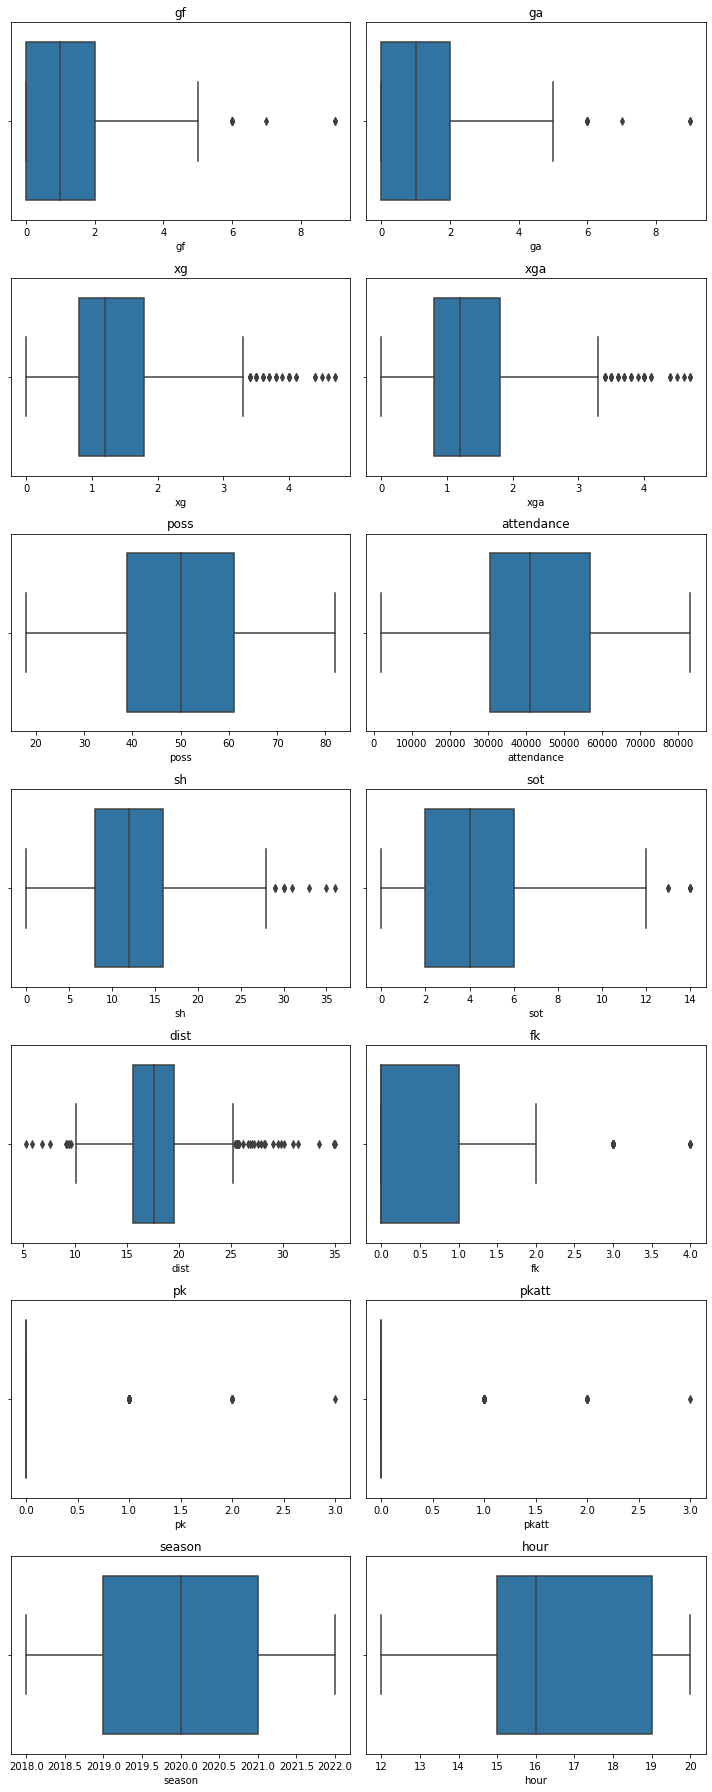

In [28]:
nrow = 7
ncol = 2
index = 0
fig, axs = plt.subplots(nrow, ncol, figsize = (10,25))
for i in range(nrow):
    for j in range(ncol):
        label = numerical_columns[index]
        sns.boxplot(match_df[label], ax=axs[i][j]).set_title(label)
        index += 1       
fig.tight_layout()
plt.show()

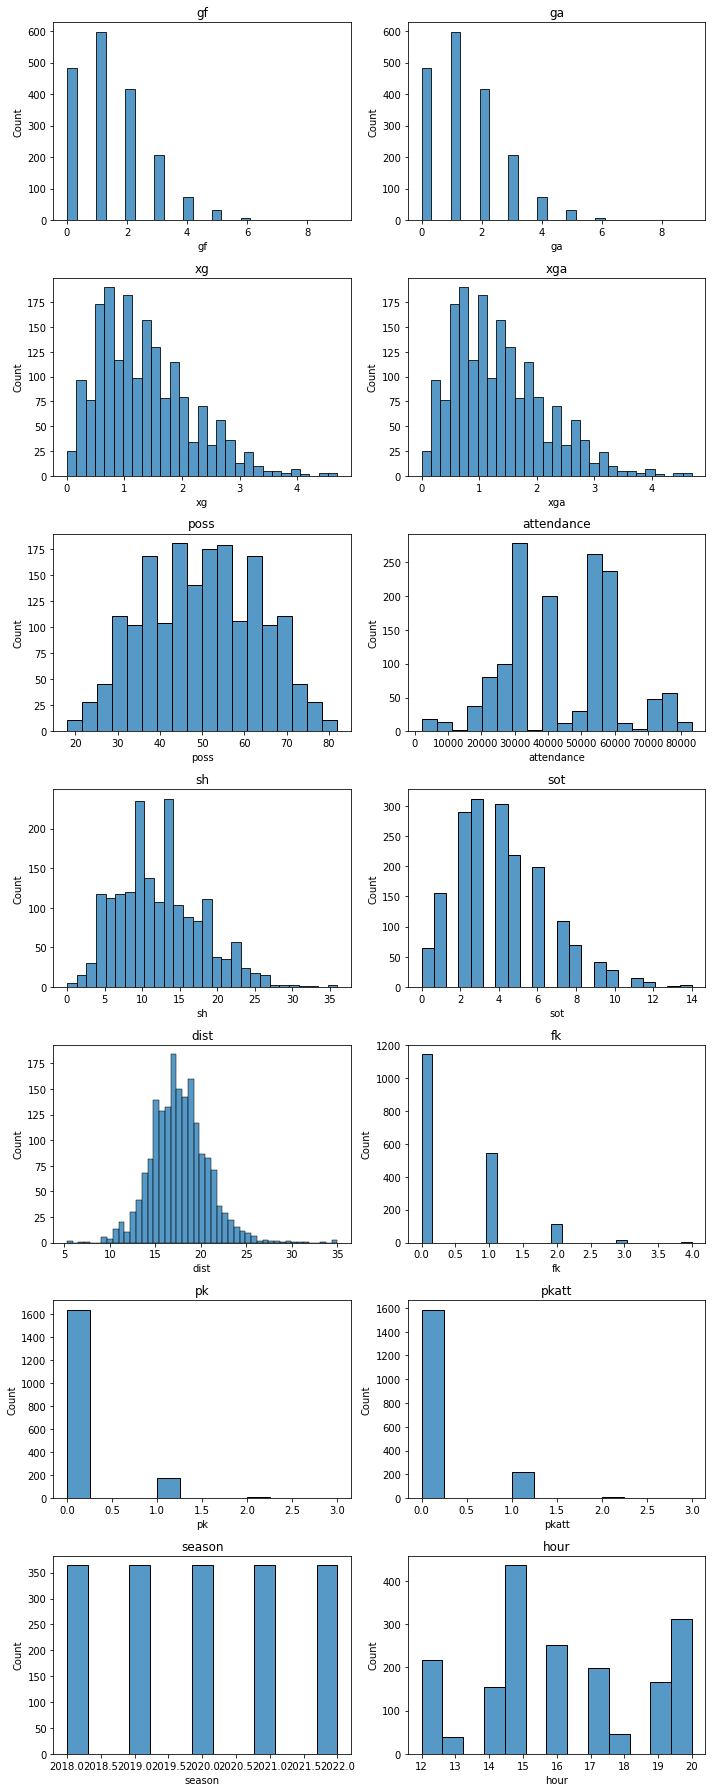

In [29]:
nrow = 7
ncol = 2
index = 0
fig, axs = plt.subplots(nrow, ncol, figsize = (10,25))
for i in range(nrow):
    for j in range(ncol):
        label = numerical_columns[index]
        sns.histplot(match_df[label], ax=axs[i][j]).set_title(label)
        index += 1       
fig.tight_layout()
plt.show()

From the boxplots and histograms, it is clear that outliers are present in the dataset. But as these data are collected from actual matches, and there was no data collection error, we cannot just remove the outliers. Instead, we need to use a classification algorithm that is not sensitive to outliers.

In [30]:
match_df.columns

Index(['date', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg',
       'xga', 'poss', 'attendance', 'formation', 'sh', 'sot', 'dist', 'fk',
       'pk', 'pkatt', 'season', 'team', 'hour'],
      dtype='object')

Before moving to the feature engineering step, let's split the dataset into training and test data.

In [31]:
match_df.groupby(["season"])['date'].count()

season
2018    364
2019    364
2020    364
2021    364
2022    364
Name: date, dtype: int64

We reserve the match records for season 2022 as the test data. All other seasons are included in the training dataset

In [32]:
train_data = match_df[match_df["season"] != 2022]
test_data = match_df[match_df["season"] == 2022]

In [33]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
print(train_data.shape)
print(test_data.shape)

(1456, 22)
(364, 22)


In [34]:
train_data.head()

,date,round,day,venue,result,gf,ga,opponent,xg,xga,...,formation,sh,sot,dist,fk,pk,pkatt,season,team,hour
0,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,...,4-2-3-1,16.0,5.0,19.8,1.0,0.0,0.0,2021,Manchester City,16
1,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,...,3-1-4-2,13.0,5.0,17.7,0.0,0.0,0.0,2021,Manchester City,17
2,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,...,4-3-3,14.0,7.0,20.9,1.0,0.0,0.0,2021,Manchester City,12
3,2020-11-08,Matchweek 8,Sun,Home,D,1,1,Liverpool,1.4,1.2,...,4-2-3-1,6.0,2.0,20.6,0.0,0.0,1.0,2021,Manchester City,16
4,2020-11-21,Matchweek 9,Sat,Away,L,0,2,Tottenham,1.4,0.7,...,4-3-3,22.0,5.0,16.0,0.0,0.0,0.0,2021,Manchester City,17


# Feature Engineering

Now let's focus on the 'attendance' column. It is noticeable that the data is missing for season 2020 and 2021. This missing values can directly be attributed to the COVID-19 restrictions imposed by the UK government. Therefore, no actual data exists for correcting these missing values. However, we can estimate the match attendance for these missing values based on prior data. For that purpose, we try to build a regression model. Before that, we need encode the categorical variables.

In [35]:
categorical_columns = train_data.select_dtypes(include="O").columns.tolist()
categorical_columns

['round', 'day', 'venue', 'result', 'opponent', 'formation', 'team']

In [36]:
train_data["round"].unique()

array(['Matchweek 3', 'Matchweek 5', 'Matchweek 6', 'Matchweek 8',
       'Matchweek 9', 'Matchweek 10', 'Matchweek 12', 'Matchweek 14',
       'Matchweek 15', 'Matchweek 17', 'Matchweek 18', 'Matchweek 19',
       'Matchweek 22', 'Matchweek 23', 'Matchweek 24', 'Matchweek 16',
       'Matchweek 25', 'Matchweek 26', 'Matchweek 27', 'Matchweek 33',
       'Matchweek 30', 'Matchweek 34', 'Matchweek 35', 'Matchweek 36',
       'Matchweek 37', 'Matchweek 38', 'Matchweek 2', 'Matchweek 7',
       'Matchweek 13', 'Matchweek 20', 'Matchweek 21', 'Matchweek 29',
       'Matchweek 1', 'Matchweek 4', 'Matchweek 31', 'Matchweek 32',
       'Matchweek 11', 'Matchweek 28'], dtype=object)

As we can observe, the matchweek number is the only valuable information in this column. Thus, we can created a new column named "MatchWeek" and fill that column with the matchweek number corresponding to each match. After that, we can drop this column. We need to do the same for X_test

In [37]:
train_data["match_week"] = train_data["round"].str.split().str[1].astype(int)

<ipython-input-37-343085114d01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["match_week"] = train_data["round"].str.split().str[1].astype(int)


In [38]:
train_data.head()

,date,round,day,venue,result,gf,ga,opponent,xg,xga,...,sh,sot,dist,fk,pk,pkatt,season,team,hour,match_week
0,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,...,16.0,5.0,19.8,1.0,0.0,0.0,2021,Manchester City,16,3
1,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,...,13.0,5.0,17.7,0.0,0.0,0.0,2021,Manchester City,17,5
2,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,...,14.0,7.0,20.9,1.0,0.0,0.0,2021,Manchester City,12,6
3,2020-11-08,Matchweek 8,Sun,Home,D,1,1,Liverpool,1.4,1.2,...,6.0,2.0,20.6,0.0,0.0,1.0,2021,Manchester City,16,8
4,2020-11-21,Matchweek 9,Sat,Away,L,0,2,Tottenham,1.4,0.7,...,22.0,5.0,16.0,0.0,0.0,0.0,2021,Manchester City,17,9


In [39]:
train_data["day"].unique()

array(['Sun', 'Sat', 'Wed', 'Fri', 'Tue', 'Mon', 'Thu'], dtype=object)

This column tells us about the day of each match. We can assign each day of the week an unique number

In [40]:
train_data["dayofweek"] = train_data["date"].dt.dayofweek

<ipython-input-40-1b7b79f95047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["dayofweek"] = train_data["date"].dt.dayofweek


In [41]:
train_data.head()

,date,round,day,venue,result,gf,ga,opponent,xg,xga,...,sot,dist,fk,pk,pkatt,season,team,hour,match_week,dayofweek
0,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,...,5.0,19.8,1.0,0.0,0.0,2021,Manchester City,16,3,6
1,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,...,5.0,17.7,0.0,0.0,0.0,2021,Manchester City,17,5,5
2,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,...,7.0,20.9,1.0,0.0,0.0,2021,Manchester City,12,6,5
3,2020-11-08,Matchweek 8,Sun,Home,D,1,1,Liverpool,1.4,1.2,...,2.0,20.6,0.0,0.0,1.0,2021,Manchester City,16,8,6
4,2020-11-21,Matchweek 9,Sat,Away,L,0,2,Tottenham,1.4,0.7,...,5.0,16.0,0.0,0.0,0.0,2021,Manchester City,17,9,5


However, it is still not the right way to encode days of the week if we want to use the data to train machine learning models! In reality, Saturday is closer to Monday than Wednesday. Encoding days of the week as numbers changes the sense of data.  We don’t want to lose the information about the circular nature of weeks and the actual distance between the days. Therefore, we can encode the day of week feature as “points” on a circle: 0° = Monday, 51.5° = Tuesday, etc.

There is one problem. We know that it is a circle, but for a machine learning model, the difference between Sunday and Monday is 308.5° instead of 51.5°. That is wrong.

To solve the problem we have to calculate the cosinus and sinus values of the degree. We need both because both functions produce duplicate outputs for difference inputs, but when we use them together we get unique pairs of values:

In [42]:
train_data['day_sin'] = np.sin(train_data['dayofweek'] * (2 * np.pi / 7))
train_data['day_cos'] = np.cos(train_data['dayofweek'] * (2 * np.pi / 7))

<ipython-input-42-c0df836840e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_sin'] = np.sin(train_data['dayofweek'] * (2 * np.pi / 7))
<ipython-input-42-c0df836840e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_cos'] = np.cos(train_data['dayofweek'] * (2 * np.pi / 7))


In [43]:
train_data.drop("dayofweek", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
train_data["venue"].unique()

array(['Home', 'Away'], dtype=object)

As there are only two unique values and there is no sense of order in this column, we can use one-hot encoding to encode the venue type

In [45]:
train_data = pd.get_dummies(train_data, columns=["venue"], drop_first=True)

In [46]:
train_data.head()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,fk,pk,pkatt,season,team,hour,match_week,day_sin,day_cos,venue_Home
0,2020-09-27,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.9,72.0,...,1.0,0.0,0.0,2021,Manchester City,16,3,-0.781831,0.623490,1
1,2020-10-17,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.9,58.0,...,0.0,0.0,0.0,2021,Manchester City,17,5,-0.974928,-0.222521,1
2,2020-10-24,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.3,69.0,...,1.0,0.0,0.0,2021,Manchester City,12,6,-0.974928,-0.222521,0
3,2020-11-08,Matchweek 8,Sun,D,1,1,Liverpool,1.4,1.2,54.0,...,0.0,0.0,1.0,2021,Manchester City,16,8,-0.781831,0.623490,1
4,2020-11-21,Matchweek 9,Sat,L,0,2,Tottenham,1.4,0.7,66.0,...,0.0,0.0,0.0,2021,Manchester City,17,9,-0.974928,-0.222521,0


In [47]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 814 kB/s 


In [48]:
from category_encoders.hashing import HashingEncoder

In [49]:
train_data["opponent"].unique()

array(['Leicester City', 'Arsenal', 'West Ham', 'Liverpool', 'Tottenham',
       'Burnley', 'Manchester Utd', 'Southampton', 'Newcastle Utd',
       'Chelsea', 'Brighton', 'Crystal Palace', 'Everton',
       'Manchester City'], dtype=object)

In [50]:
train_data["team"].unique()

array(['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham', 'Arsenal',
       'Manchester Utd', 'West Ham', 'Leicester City', 'Brighton',
       'Newcastle Utd', 'Crystal Palace', 'Southampton', 'Everton',
       'Burnley'], dtype=object)

In [51]:
def hash_encode(col, hash_size=8):
    ec = HashingEncoder([col], n_components=hash_size)
    ec.fit(train_data)
    return ec

In [52]:
transformed_opponent = hash_encode("opponent", 5).transform(train_data)
transformed_team = hash_encode("team", 5).transform(train_data)

In [53]:
name_map = lambda x: {"col_0": x+"_0", "col_1": x+"_1", "col_2": x+"_2", "col_3": x+"_3", "col_4": x+"_4"}

In [54]:
opponent_map = name_map("opponent")
team_map = name_map("team")

In [55]:
transformed_opponent.rename(opponent_map, axis=1, inplace=True)
transformed_team.rename(team_map, axis=1, inplace=True)

In [56]:
train_data = pd.concat([train_data, transformed_opponent[['opponent_0', 'opponent_1', 'opponent_2', 'opponent_3', 'opponent_4']]], axis=1)
train_data = pd.concat([train_data, transformed_team[['team_0', 'team_1', 'team_2', 'team_3', 'team_4']]], axis=1)

In [57]:
train_data.columns

Index(['date', 'round', 'day', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga',
       'poss', 'attendance', 'formation', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'hour', 'match_week', 'day_sin', 'day_cos',
       'venue_Home', 'opponent_0', 'opponent_1', 'opponent_2', 'opponent_3',
       'opponent_4', 'team_0', 'team_1', 'team_2', 'team_3', 'team_4'],
      dtype='object')

In [58]:
train_data.head()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,opponent_0,opponent_1,opponent_2,opponent_3,opponent_4,team_0,team_1,team_2,team_3,team_4
0,2020-09-27,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.9,72.0,...,3,1,1,0,1,3,1,1,0,1
1,2020-10-17,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.9,58.0,...,1,1,2,0,2,1,1,2,0,2
2,2020-10-24,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.3,69.0,...,2,2,1,1,0,2,2,1,1,0
3,2020-11-08,Matchweek 8,Sun,D,1,1,Liverpool,1.4,1.2,54.0,...,4,1,1,0,0,4,1,1,0,0
4,2020-11-21,Matchweek 9,Sat,L,0,2,Tottenham,1.4,0.7,66.0,...,2,0,1,1,2,2,0,1,1,2


In [59]:
train_data["formation"].unique()

array(['4-2-3-1', '3-1-4-2', '4-3-3', '3-4-3◆', '4-4-1-1', '4-3-1-2',
       '4-4-2', '4-2-2-2', '3-4-3', '3-4-1-2', '4-1-2-1-2◆', '5-4-1',
       '4-1-4-1', '3-5-2', '3-5-1-1', '5-3-2', '4-3-2-1', '4-5-1',
       '4-1-3-2'], dtype=object)

We can observe there are some non-numeric characters. We need to remove this characters. Moreover, we can extract the number of defenders, midfielders, and strikers from this column. 

In [60]:
train_data["formation"] = train_data["formation"].str.replace("◆", "")

In [61]:
train_data["num_defender"] = train_data["formation"].str.split(pat="-").str[0].astype(int)

In [62]:
train_data["num_striker"] = train_data["formation"].str.split(pat="-").str[-1].astype(int)

In [63]:
offensive_midfield_mapper = lambda x: x[4] if len(x) == 7 else 0
center_midfield_mapper = lambda x: x[2] if len(x) == 5 else 0

In [64]:
train_data["offensive_midfielder"] = train_data["formation"].apply(offensive_midfield_mapper).astype(int)

In [65]:
train_data["center_midfielder"] = train_data["formation"].apply(center_midfield_mapper).astype(int)

In [66]:
train_data.head()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,opponent_4,team_0,team_1,team_2,team_3,team_4,num_defender,num_striker,offensive_midfielder,center_midfielder
0,2020-09-27,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.9,72.0,...,1,3,1,1,0,1,4,1,3,0
1,2020-10-17,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.9,58.0,...,2,1,1,2,0,2,3,2,4,0
2,2020-10-24,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.3,69.0,...,0,2,2,1,1,0,4,3,0,3
3,2020-11-08,Matchweek 8,Sun,D,1,1,Liverpool,1.4,1.2,54.0,...,0,4,1,1,0,0,4,1,3,0
4,2020-11-21,Matchweek 9,Sat,L,0,2,Tottenham,1.4,0.7,66.0,...,2,2,0,1,1,2,4,3,0,3


In [67]:
train_data["result"].unique()

array(['L', 'W', 'D'], dtype=object)

As the results are ordinal data (L < D < W), we can use ordinal encoding for the target variable

In [68]:
result_map = {"L":0, "D":1, "W":2}
train_data["target"] = train_data["result"].map(result_map)

Finally, we are done with feature encoding. As we found during the exploratory data analysis, there are some missing values left in two columns: attendance, and dist. Let's deal with these missing values one by one.

In [69]:
train_data.isnull().sum()

date                      0
round                     0
day                       0
result                    0
gf                        0
ga                        0
opponent                  0
xg                        0
xga                       0
poss                      0
attendance              414
formation                 0
sh                        0
sot                       0
dist                      1
fk                        0
pk                        0
pkatt                     0
season                    0
team                      0
hour                      0
match_week                0
day_sin                   0
day_cos                   0
venue_Home                0
opponent_0                0
opponent_1                0
opponent_2                0
opponent_3                0
opponent_4                0
team_0                    0
team_1                    0
team_2                    0
team_3                    0
team_4                    0
num_defender        

As only one data is missing from the 'dist' column, it is probably missing completely at random. As the 'dist' column had some outliers, we can replace the missing value with the median value of the 'dist' column

In [70]:
median_dist = train_data["dist"].median()

In [71]:
median_dist

17.7

In [72]:
train_data["dist"].fillna(median_dist, inplace=True)

In [73]:
train_data["dist"].isnull().sum()

0

Now let's focus on the 'attendance' column. The match attendance depends on a number of other factors like day, team, opponent, venue_type, etc. So, we can use MCIE method to impute the missing values for this column.

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import HuberRegressor

In [75]:
numerical_columns = train_data.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['gf',
 'ga',
 'xg',
 'xga',
 'poss',
 'attendance',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'hour',
 'match_week',
 'day_sin',
 'day_cos',
 'venue_Home',
 'opponent_0',
 'opponent_1',
 'opponent_2',
 'opponent_3',
 'opponent_4',
 'team_0',
 'team_1',
 'team_2',
 'team_3',
 'team_4',
 'num_defender',
 'num_striker',
 'offensive_midfielder',
 'center_midfielder',
 'target']

In [76]:
estimator = HuberRegressor(max_iter=15000)
imputer = IterativeImputer(estimator=estimator, random_state=2022, skip_complete=True)
imputed_train_data = imputer.fit_transform(train_data[numerical_columns])

In [77]:
train_data['attendance'] = imputed_train_data[:, 5]
train_data.head()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,team_0,team_1,team_2,team_3,team_4,num_defender,num_striker,offensive_midfielder,center_midfielder,target
0,2020-09-27,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.9,72.0,...,3,1,1,0,1,4,1,3,0,0
1,2020-10-17,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.9,58.0,...,1,1,2,0,2,3,2,4,0,2
2,2020-10-24,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.3,69.0,...,2,2,1,1,0,4,3,0,3,1
3,2020-11-08,Matchweek 8,Sun,D,1,1,Liverpool,1.4,1.2,54.0,...,4,1,1,0,0,4,1,3,0,1
4,2020-11-21,Matchweek 9,Sat,L,0,2,Tottenham,1.4,0.7,66.0,...,2,0,1,1,2,4,3,0,3,0


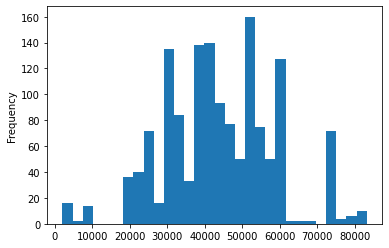

In [78]:
train_data["attendance"].plot.hist(bins=30)

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1456 non-null   datetime64[ns]
 1   round                 1456 non-null   object        
 2   day                   1456 non-null   object        
 3   result                1456 non-null   object        
 4   gf                    1456 non-null   int64         
 5   ga                    1456 non-null   int64         
 6   opponent              1456 non-null   object        
 7   xg                    1456 non-null   float64       
 8   xga                   1456 non-null   float64       
 9   poss                  1456 non-null   float64       
 10  attendance            1456 non-null   float64       
 11  formation             1456 non-null   object        
 12  sh                    1456 non-null   float64       
 13  sot               

As we can notice, there are no missing values in the dataset. However, the dataset doesn't have any column capturing the past performance of a teamHowever, we haven't yet considered the historical performance of a team. It may have a significant influence on the winner prediction. We use the 'rolling average' method to capture the past performance of each time. For that purpose, we temporarily merge the training and test dataset.

In [80]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [81]:
cols = ["gf", 'ga', 'sh', 'sot', 'dist', 'poss', 'fk', 'pk', 'pkatt']
new_cols = [f"{c}_rolling" for c in cols]
train_data = train_data.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [82]:
train_data.index = train_data.index.droplevel()

In [83]:
train_data.index = range(train_data.shape[0])

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1414 non-null   datetime64[ns]
 1   round                 1414 non-null   object        
 2   day                   1414 non-null   object        
 3   result                1414 non-null   object        
 4   gf                    1414 non-null   int64         
 5   ga                    1414 non-null   int64         
 6   opponent              1414 non-null   object        
 7   xg                    1414 non-null   float64       
 8   xga                   1414 non-null   float64       
 9   poss                  1414 non-null   float64       
 10  attendance            1414 non-null   float64       
 11  formation             1414 non-null   object        
 12  sh                    1414 non-null   float64       
 13  sot               

In [85]:
train_data.head()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2017-10-01,Matchweek 7,Sun,W,2,0,Brighton,2.4,0.4,64.0,...,2,1.333333,2.333333,15.333333,4.000000,17.933333,56.333333,0.666667,0.0,0.0
1,2017-10-22,Matchweek 9,Sun,W,5,2,Everton,3.5,1.0,67.0,...,2,0.666667,1.333333,14.666667,3.333333,17.500000,55.000000,0.666667,0.0,0.0
2,2017-11-05,Matchweek 11,Sun,L,1,3,Manchester City,0.3,1.8,43.0,...,0,2.333333,0.666667,22.000000,8.000000,17.500000,60.000000,0.333333,0.0,0.0
3,2017-11-18,Matchweek 12,Sat,W,2,0,Tottenham,2.1,0.7,43.0,...,2,2.666667,1.666667,20.333333,8.333333,18.500000,58.000000,0.333333,0.0,0.0
4,2017-11-26,Matchweek 13,Sun,W,1,0,Burnley,1.8,0.4,64.0,...,2,2.666667,1.666667,16.666667,7.333333,17.833333,51.000000,0.333333,0.0,0.0


In [86]:
train_data.tail()

,date,round,day,result,gf,ga,opponent,xg,xga,poss,...,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,pk_rolling,pkatt_rolling
1409,2021-04-24,Matchweek 33,Sat,L,0,1,Chelsea,0.4,2.5,45.0,...,0,2.666667,2.666667,11.333333,4.666667,15.866667,47.000000,0.000000,0.333333,0.333333
1410,2021-05-03,Matchweek 34,Mon,W,2,1,Burnley,2.3,2.0,55.0,...,2,1.666667,2.000000,9.333333,3.666667,19.300000,49.333333,0.333333,0.333333,0.333333
1411,2021-05-09,Matchweek 35,Sun,L,0,1,Everton,1.3,1.5,68.0,...,0,1.333333,1.666667,15.333333,3.666667,19.800000,55.333333,0.666667,0.333333,0.333333
1412,2021-05-15,Matchweek 36,Sat,D,1,1,Brighton,1.7,0.8,49.0,...,1,0.666667,1.000000,14.000000,2.000000,18.633333,56.000000,0.666667,0.000000,0.000000
1413,2021-05-23,Matchweek 38,Sun,W,3,0,Southampton,1.3,1.5,38.0,...,2,1.000000,1.000000,16.000000,2.000000,17.100000,57.333333,0.333333,0.000000,0.000000


It is important to realize that we want to predict the result of current match based on the data of previous matches. For that purpose, we have just added some features that represent past performance. Now, we can delete all those data for current matches that may provide the machine learning model a hint about the winner

In [87]:
train_data.drop(["gf", 'ga', 'sh', 'sot', 'dist', 'poss', 'fk', 'pk', 'pkatt'], axis=1, inplace=True)

In [88]:
print(train_data.shape)
print(test_data.shape)

(1414, 40)
(364, 22)


In [89]:
drop_cols = categorical_columns + ["season"]
drop_cols.remove("venue")
train_data.drop(drop_cols, axis=1, inplace=True)

In [90]:
print(train_data.shape)

(1414, 33)


Now, we perform standardization to complete the feature engineering process. As outliers are present in the dataset, we apply robustscaling method

In [91]:
X_train = train_data.drop("target", axis=1)
y_train = train_data["target"]

In [92]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns.to_list()
cols.remove("date")
index_labels = X_train['date']
scaler = RobustScaler(unit_variance=True)
X_train = pd.DataFrame(scaler.fit_transform(X_train.drop("date", axis=1)), columns=cols, index=index_labels)

In [93]:
X_train.head()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,venue_Home,opponent_0,opponent_1,...,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,pk_rolling,pkatt_rolling
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,1.471614,-0.981076,1.067667,-1.348980,-0.974263,0.000000,1.34898,1.34898,-1.348980,1.34898,...,0.337245,0.000000,1.34898,0.856495,0.000000,0.141998,0.577104,0.67449,0.0,0.0
2017-10-22,2.820594,-0.245269,-0.214305,-1.011735,-0.824376,0.000000,1.34898,0.00000,-1.348980,1.34898,...,0.337245,-0.674490,0.00000,0.685196,-0.385423,-0.088749,0.461683,0.67449,0.0,0.0
2017-11-05,-1.103711,0.735807,0.744333,-0.674490,-0.674490,0.000000,1.34898,0.00000,1.348980,-1.34898,...,0.337245,1.011735,-0.89932,2.569485,2.312536,-0.088749,0.894510,0.00000,0.0,0.0
2017-11-18,1.103711,-0.613173,1.077319,-1.348980,-0.599546,-0.267182,0.00000,1.34898,-2.697959,0.00000,...,0.337245,1.348980,0.44966,2.141237,2.505248,0.443743,0.721379,0.00000,0.0,0.0
2017-11-26,0.735807,-0.981076,-1.323435,-0.674490,-0.524603,0.000000,1.34898,0.00000,-1.348980,1.34898,...,0.337245,1.348980,0.44966,1.199093,1.927114,0.088749,0.115421,0.00000,0.0,0.0


In [94]:
X_train.describe()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,venue_Home,opponent_0,opponent_1,...,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,pk_rolling,pkatt_rolling
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,...,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,0.141368,0.142495,0.062910,0.081330,-0.005618,0.394912,0.495031,0.673536,-0.592444,0.397825,...,-0.306955,0.062250,0.082681,0.047671,0.057241,0.038763,0.030875,0.279050,0.433124,0.551422
std,0.963921,0.965150,0.932177,0.863651,0.801858,0.961781,0.818042,0.674728,1.319672,1.210626,...,0.633861,0.795442,1.025703,0.963029,0.943689,1.045559,0.867709,0.830252,0.764844,0.870009
min,-1.471614,-1.471614,-2.575754,-1.348980,-1.423923,-0.267182,-1.081798,0.000000,-2.697959,-1.348980,...,-1.011735,-1.348980,-1.798639,-2.398186,-2.312536,-3.265950,-2.106428,-0.674490,0.000000,0.000000
25%,-0.613173,-0.613173,-0.666479,-0.337245,-0.674490,-0.267182,0.000000,0.000000,-1.348980,0.000000,...,-1.011735,-0.674490,-0.449660,-0.685196,-0.578134,-0.674490,-0.656455,-0.674490,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735807,0.735807,0.682501,1.011735,0.674490,1.081798,1.348980,1.348980,0.000000,1.348980,...,0.337245,0.674490,0.899320,0.663784,0.770845,0.674490,0.692524,0.674490,1.348980,1.348980
max,4.292208,4.292208,2.581727,1.348980,1.348980,2.430777,1.949332,1.348980,4.046939,4.046939,...,0.674490,3.709694,4.946258,3.340330,3.083382,4.401933,2.135283,4.046939,4.046939,5.395918


[Text(0, 0, 'xg'),
 Text(0, 0, 'xga'),
 Text(0, 0, 'attendance'),
 Text(0, 0, 'hour'),
 Text(0, 0, 'match_week'),
 Text(0, 0, 'day_sin'),
 Text(0, 0, 'day_cos'),
 Text(0, 0, 'venue_Home'),
 Text(0, 0, 'opponent_0'),
 Text(0, 0, 'opponent_1'),
 Text(0, 0, 'opponent_2'),
 Text(0, 0, 'opponent_3'),
 Text(0, 0, 'opponent_4'),
 Text(0, 0, 'team_0'),
 Text(0, 0, 'team_1'),
 Text(0, 0, 'team_2'),
 Text(0, 0, 'team_3'),
 Text(0, 0, 'team_4'),
 Text(0, 0, 'num_defender'),
 Text(0, 0, 'num_striker'),
 Text(0, 0, 'offensive_midfielder'),
 Text(0, 0, 'center_midfielder'),
 Text(0, 0, 'gf_rolling'),
 Text(0, 0, 'ga_rolling'),
 Text(0, 0, 'sh_rolling'),
 Text(0, 0, 'sot_rolling'),
 Text(0, 0, 'dist_rolling'),
 Text(0, 0, 'poss_rolling'),
 Text(0, 0, 'fk_rolling'),
 Text(0, 0, 'pk_rolling'),
 Text(0, 0, 'pkatt_rolling')]

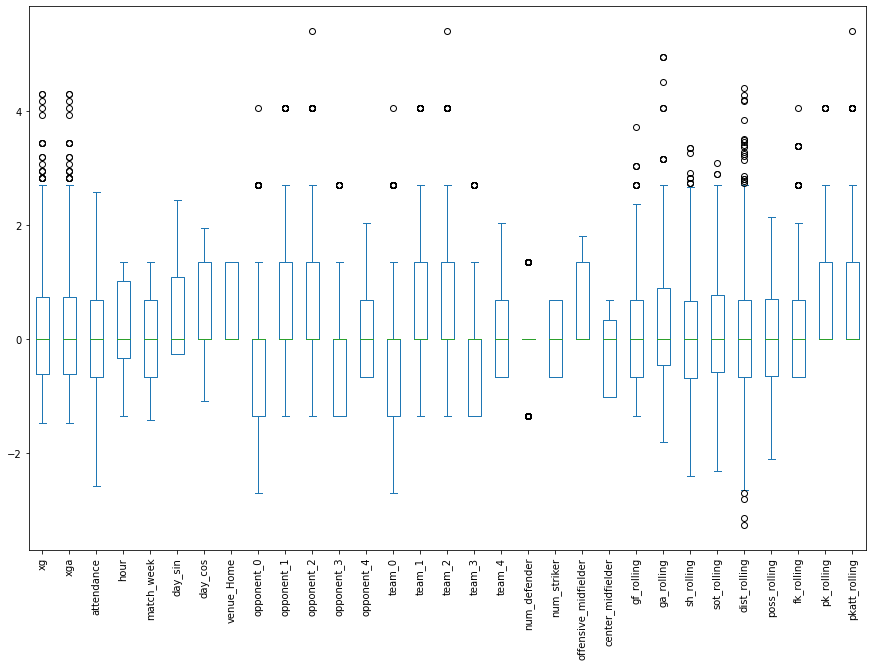

In [95]:
ax = X_train.plot.box(figsize=(15, 10))
ax.set_xticklabels(labels=cols, rotation=90)

# Feature Selection

In [96]:
corr = X_train.corr()

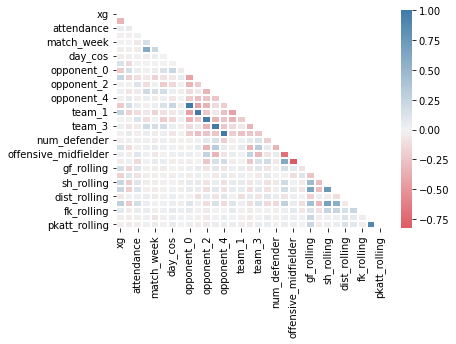

In [97]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(corr, mask=mask,
            center=0, cmap=cmap, linewidths=1,
            annot=False, fmt=".2f")

In [98]:
# Create positive correlation matrix
corr_df = X_train.corr().abs()
# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)

['opponent_0', 'opponent_1', 'opponent_2', 'opponent_3', 'opponent_4']


Before taking any action, let's double check if these columns have very high variance inflation factor

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
def find_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
    return vif_data

In [101]:
vif_xtrain = find_vif(X_train)
print(vif_xtrain)

                 feature       VIF
0                     xg  1.367425
1                    xga  1.179430
2             attendance  1.099349
3                   hour  1.641997
4             match_week  1.132262
5                day_sin  1.836828
6                day_cos  1.308681
7             venue_Home  1.683703
8             opponent_0       inf
9             opponent_1       inf
10            opponent_2       inf
11            opponent_3       inf
12            opponent_4       inf
13                team_0       inf
14                team_1       inf
15                team_2       inf
16                team_3       inf
17                team_4       inf
18          num_defender  1.427096
19           num_striker  3.185223
20  offensive_midfielder  6.661029
21     center_midfielder  4.563972
22            gf_rolling  2.122998
23            ga_rolling  1.179673
24            sh_rolling  3.197413
25           sot_rolling  3.560707
26          dist_rolling  1.150289
27          poss_rol

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [102]:
X_train_reduced = X_train.drop(['opponent_0', 'opponent_1', 'opponent_2', 'opponent_3', 'opponent_4'], axis=1)
vif_xtrain_reduced = find_vif(X_train_reduced)
print(vif_xtrain_reduced)

                 feature       VIF
0                     xg  1.367425
1                    xga  1.179430
2             attendance  1.099349
3                   hour  1.641997
4             match_week  1.132262
5                day_sin  1.836828
6                day_cos  1.308681
7             venue_Home  1.683703
8                 team_0       inf
9                 team_1       inf
10                team_2       inf
11                team_3       inf
12                team_4       inf
13          num_defender  1.427096
14           num_striker  3.185223
15  offensive_midfielder  6.661029
16     center_midfielder  4.563972
17            gf_rolling  2.122998
18            ga_rolling  1.179673
19            sh_rolling  3.197413
20           sot_rolling  3.560707
21          dist_rolling  1.150289
22          poss_rolling  2.408564
23            fk_rolling  1.261109
24            pk_rolling  7.046177
25         pkatt_rolling  7.183374


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Even after removing all feature encodings for the 'oponnent' column, the VIF is extremely high for the 'team' column. IT suggests that some part of the hash encoding for the 'team' column may be redundant. So, we try dropping 'team_0' from the columns

In [103]:
X_train_reduced = X_train.drop(['opponent_0', 'opponent_1', 'opponent_2', 'opponent_3', 'opponent_4'] + ["team_0"], axis=1)
vif_xtrain_reduced = find_vif(X_train_reduced)
print(vif_xtrain_reduced)

                 feature       VIF
0                     xg  1.367425
1                    xga  1.179430
2             attendance  1.099349
3                   hour  1.641997
4             match_week  1.132262
5                day_sin  1.836828
6                day_cos  1.308681
7             venue_Home  1.683703
8                 team_1  1.588378
9                 team_2  1.951065
10                team_3  2.296598
11                team_4  1.638009
12          num_defender  1.427096
13           num_striker  3.185223
14  offensive_midfielder  6.661029
15     center_midfielder  4.563972
16            gf_rolling  2.122998
17            ga_rolling  1.179673
18            sh_rolling  3.197413
19           sot_rolling  3.560707
20          dist_rolling  1.150289
21          poss_rolling  2.408564
22            fk_rolling  1.261109
23            pk_rolling  7.046177
24         pkatt_rolling  7.183374


In [104]:
vif_xtrain_reduced["VIF"].mean()

2.546853952159468

Now, the VIF for each feature is less than 10. Moreover, the mean VIF is less than 6. So, we don't have any multi-collinear column in the dataset.

In [105]:
X_train = X_train_reduced.copy()

In [106]:
X_train.head()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,venue_Home,team_1,team_2,...,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,pk_rolling,pkatt_rolling
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,1.471614,-0.981076,1.067667,-1.348980,-0.974263,0.000000,1.34898,1.34898,1.34898,1.34898,...,0.337245,0.000000,1.34898,0.856495,0.000000,0.141998,0.577104,0.67449,0.0,0.0
2017-10-22,2.820594,-0.245269,-0.214305,-1.011735,-0.824376,0.000000,1.34898,0.00000,1.34898,0.00000,...,0.337245,-0.674490,0.00000,0.685196,-0.385423,-0.088749,0.461683,0.67449,0.0,0.0
2017-11-05,-1.103711,0.735807,0.744333,-0.674490,-0.674490,0.000000,1.34898,0.00000,-1.34898,1.34898,...,0.337245,1.011735,-0.89932,2.569485,2.312536,-0.088749,0.894510,0.00000,0.0,0.0
2017-11-18,1.103711,-0.613173,1.077319,-1.348980,-0.599546,-0.267182,0.00000,1.34898,0.00000,1.34898,...,0.337245,1.348980,0.44966,2.141237,2.505248,0.443743,0.721379,0.00000,0.0,0.0
2017-11-26,0.735807,-0.981076,-1.323435,-0.674490,-0.524603,0.000000,1.34898,0.00000,1.34898,0.00000,...,0.337245,1.348980,0.44966,1.199093,1.927114,0.088749,0.115421,0.00000,0.0,0.0


Now, let's try other feature selection method to check if the number of features can be  further reduced

In [107]:
from sklearn.feature_selection import mutual_info_classif

In [108]:
mutual_info = mutual_info_classif(X_train, y_train)
print(mutual_info)

[9.85143324e-02 9.41025067e-02 7.46116039e-04 0.00000000e+00
 0.00000000e+00 2.72880758e-02 0.00000000e+00 1.53765577e-03
 1.73446657e-01 0.00000000e+00 0.00000000e+00 2.26306621e-02
 3.23308455e-03 7.93408435e-03 1.38475805e-04 3.83061653e-02
 6.49905140e-03 1.63290469e-02 9.45459925e-03 2.15715804e-02
 1.65272167e-04 6.06740108e-03 0.00000000e+00 4.99437543e-03
 6.45069413e-03]


In [109]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

team_1                  0.173447
xg                      0.098514
xga                     0.094103
center_midfielder       0.038306
day_sin                 0.027288
team_4                  0.022631
sot_rolling             0.021572
ga_rolling              0.016329
sh_rolling              0.009455
num_striker             0.007934
gf_rolling              0.006499
pkatt_rolling           0.006451
poss_rolling            0.006067
pk_rolling              0.004994
num_defender            0.003233
venue_Home              0.001538
attendance              0.000746
dist_rolling            0.000165
offensive_midfielder    0.000138
team_3                  0.000000
team_2                  0.000000
day_cos                 0.000000
match_week              0.000000
hour                    0.000000
fk_rolling              0.000000
dtype: float64

In [110]:
mask_MI = ~(X_train.columns.isin(mutual_info[mutual_info == 0].index))
mask_MI

array([ True,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True])

In [111]:
X_train.columns[mask_MI]

Index(['xg', 'xga', 'attendance', 'day_sin', 'venue_Home', 'team_1', 'team_4',
       'num_defender', 'num_striker', 'offensive_midfielder',
       'center_midfielder', 'gf_rolling', 'ga_rolling', 'sh_rolling',
       'sot_rolling', 'dist_rolling', 'poss_rolling', 'pk_rolling',
       'pkatt_rolling'],
      dtype='object')

As it is clear, there are a few columns which provide zero gain in mutual information. These are the candidate columns that can be dropped. But before taking action, let'try other methods

In [112]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=20, verbose=0)
rfe_rf.fit(X_train,y_train)
rf_mask = rfe_rf.support_

In [113]:
X_train.columns[rf_mask]

Index(['xg', 'xga', 'attendance', 'hour', 'match_week', 'day_sin', 'day_cos',
       'team_1', 'team_2', 'team_3', 'team_4', 'num_striker',
       'center_midfielder', 'gf_rolling', 'ga_rolling', 'sh_rolling',
       'sot_rolling', 'dist_rolling', 'poss_rolling', 'fk_rolling'],
      dtype='object')

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=20, step=5)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

In [115]:
X_train.columns[gb_mask]

Index(['xg', 'xga', 'attendance', 'hour', 'match_week', 'day_sin',
       'venue_Home', 'team_1', 'team_2', 'team_3', 'team_4', 'num_striker',
       'center_midfielder', 'gf_rolling', 'ga_rolling', 'sh_rolling',
       'sot_rolling', 'dist_rolling', 'poss_rolling', 'fk_rolling'],
      dtype='object')

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train, y_train)
ranked_features=pd.Series(etc.feature_importances_, index=X_train.columns)
top_features = ranked_features.nlargest(20)
etc_mask = X_train.columns.isin(top_features.index)

In [117]:
X_train.columns[etc_mask]

Index(['xg', 'xga', 'attendance', 'hour', 'match_week', 'day_sin', 'day_cos',
       'team_1', 'team_2', 'team_3', 'team_4', 'num_striker', 'gf_rolling',
       'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling',
       'poss_rolling', 'fk_rolling', 'pkatt_rolling'],
      dtype='object')

In [118]:
votes = np.sum([mask_MI, rf_mask, gb_mask, etc_mask], axis=0)

In [119]:
mask = votes >= 3

In [120]:
selected_col = X_train.columns[mask].to_list()

In [121]:
selected_col

['xg',
 'xga',
 'attendance',
 'hour',
 'match_week',
 'day_sin',
 'team_1',
 'team_2',
 'team_3',
 'team_4',
 'num_striker',
 'center_midfielder',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'poss_rolling',
 'fk_rolling']

In [122]:
selected_col.extend(["team_3"])
selected_col

['xg',
 'xga',
 'attendance',
 'hour',
 'match_week',
 'day_sin',
 'team_1',
 'team_2',
 'team_3',
 'team_4',
 'num_striker',
 'center_midfielder',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'poss_rolling',
 'fk_rolling',
 'team_3']

In [123]:
X_train = X_train[selected_col]

In [124]:
X_train.shape

(1414, 20)

# Pipeline Creation

Now we have completed all the preprocessing steps on the training data. However, we need to apply all these same steps on the validation data and test. And we need to do so without data leakage. To automate the preprocessing step and prevent data leakge, we build a pipeline for machine learning model. For that purpose, we again start with the unprocessed data, which will be fed to the pipeline.

In [125]:
match_df["dayofweek"] = match_df["date"].dt.dayofweek
match_df.drop("day", axis=1, inplace=True)
train_data = match_df[match_df["season"] != 2022]
test_data = match_df[match_df["season"] == 2022]
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
print(train_data.shape)
print(test_data.shape)

(1456, 22)
(364, 22)


In [126]:
from sklearn.pipeline import Pipeline, FeatureUnion, clone, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer, make_column_selector

In [127]:
class SelectColumnsTransfomer(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer that provides column selection
    
    Allows to select columns by name from pandas dataframes in scikit-learn
    pipelines.
    
    Parameters
    ----------
    columns : list of str, names of the dataframe columns to select
        Default: [] 
    
    """
    def __init__(self, columns=[]):
        self.columns = columns

    def transform(self, X, **transform_params):
        """ Selects columns of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
            
        Returns
        ----------
        
        trans : pandas DataFrame
            contains selected columns of X      
        """
        trans = X[self.columns].copy() 
        return trans

    def fit(self, X, y=None, **fit_params):
        """ Do nothing function
        
        Parameters
        ----------
        X : pandas DataFrame
        y : default None
                
        
        Returns
        ----------
        self  
        """
        return self
    

class DataFrameFunctionTransformer(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer providing imputation or function application
    
    Parameters
    ----------
    impute : Boolean, default False
        
    func : function that acts on an array of the form [n_elements, 1]
    
    """
    
    def __init__(self, func):
        self.func = func 

    def transform(self, X, **transformparams):
        """ Transforms a DataFrame
        
        Parameters
        ----------
        X : DataFrame
            
        Returns
        ----------
        trans : pandas DataFrame
            Transformation of X 
        """
        trans = pd.DataFrame(X).apply(self.func).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Fixes the values to impute or does nothing
        
        Parameters
        ----------
        X : pandas DataFrame
        y : not used, API requirement
                
        Returns
        ----------
        self  
        """
        return self
    
    
class DataFrameFeatureUnion(BaseEstimator, TransformerMixin):
    """ A DataFrame transformer that unites several DataFrame transformers
    
    Fit several DataFrame transformers and provides a concatenated
    Data Frame
    
    Parameters
    ----------
    list_of_transformers : list of DataFrameTransformers
        
    """ 
    def __init__(self, list_of_transformers):
        self.list_of_transformers = list_of_transformers
        
    def transform(self, X, **transformparamn):
        """ Applies the fitted transformers on a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        concatted :  pandas DataFrame
        
        """
        
        concatted = pd.concat([transformer.transform(X)
                            for transformer in
                            self.fitted_transformers_], axis=1).copy()
        return concatted


    def fit(self, X, y=None, **fitparams):
        """ Fits several DataFrame Transformers
        
        Parameters
        ----------
        X : pandas DataFrame
        y : not used, API requirement
        
        Returns
        ----------
        self : object
        """
        
        self.fitted_transformers_ = []
        for transformer in self.list_of_transformers:
            fitted_trans = clone(transformer).fit(X, y=None, **fitparams)
            self.fitted_transformers_.append(fitted_trans)
        return self
    

class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    def __init__(self):
        self.drop_first = True
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X, drop_first = self.drop_first).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self

In [128]:
class RoundTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer to extract match week from the 'round' column
    """
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transformparams):
        X = X.squeeze() # convert to a series to perform string operations
        match_week = X.str.split().str[1].astype(int)
        return match_week.to_frame(name="match_week").copy()

In [129]:
class DayTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer for feature encoding the 'day' column
    """
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transformparams):
        day_sin = np.sin(X * (2 * np.pi / 7))
        day_cos = np.cos(X * (2 * np.pi / 7))
        trans_day = np.concatenate((day_sin, day_cos), axis=1)
        return pd.DataFrame(trans_day, columns=["day_sin", "day_cos"]).copy()  

In [130]:
class FeatureHasher(BaseEstimator, TransformerMixin):
    def __init__(self, hash_size, name_map=None):
      self.name_map = name_map
      self.hash_size = hash_size
      self.encoder = HashingEncoder(n_components=self.hash_size, return_df=True)

    def fit(self, X, y=None, **fit_params):
        self.encoder.fit(X)
        return self

    def transform(self, X, **transformparams):
        trans_x = self.encoder.transform(X)
        if self.name_map:
            trans_x.rename(self.name_map, axis=1, inplace=True)
        return trans_x.copy()

In [131]:
from category_encoders import OrdinalEncoder

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col_name, mapping):
      self.col_name = col_name
      self.mapping = mapping
      self.cols_mapping = [{
          "col": self.col_name,
          "mapping": self.mapping
      }]
      self.encoder = OrdinalEncoder(mapping=self.cols_mapping, return_df=True)

    def fit(self, X, y=None, **fit_params):
        self.encoder.fit(X)
        return self

    def transform(self, X, **transformparams):
        return self.encoder.transform(X).copy()

In [132]:
class FormationTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transformparams):
        X = X.squeeze()
        formation = X.str.replace("◆", "")
        num_defender = formation.str.split(pat="-").str[0].astype(int)
        num_striker = formation.str.split(pat="-").str[-1].astype(int)
        offensive_midfield_mapper = lambda x: x[4] if len(x) == 7 else 0
        center_midfield_mapper = lambda x: x[2] if len(x) == 5 else 0
        offensive_midfielder = formation.apply(offensive_midfield_mapper).astype(int)
        center_midfielder = formation.apply(center_midfield_mapper).astype(int)
        return pd.DataFrame(dict(num_defender=num_defender, num_striker=num_striker,\
                                 offensive_midfielder=offensive_midfielder,\
                                 center_midfielder=center_midfielder)).copy()

In [133]:
class RollingAverageComputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, group_by, sort_by):
        self.cols = columns
        self.group_by = group_by
        self.sort_by = sort_by

    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transformparams):
        def rolling_averages(group, cols, new_cols, sort_by):
            group = group.sort_values(sort_by)
            rolling_stats = group[cols].rolling(3, closed='left').mean()
            group[new_cols] = rolling_stats
            group = group.dropna(subset=new_cols)
            return group
        new_cols = [f"{c}_rolling" for c in self.cols]
        trans_X = X.groupby(self.group_by).apply(lambda x: rolling_averages(x, self.cols, new_cols, self.sort_by))
        trans_X.index = trans_X.index.droplevel()
        trans_X.index = range(trans_X.shape[0])
        return trans_X.copy()

In [134]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, select_columns):
        self.to_select = select_columns

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transformparams):
        trans_X = X[self.to_select]
        return trans_X.copy()

In [135]:
from sklearn.preprocessing import RobustScaler

class Standardizer(BaseEstimator, TransformerMixin):
    def __init__(self, scaler):
        self.scaler = scaler

    def fit(self, X, y=None, **fit_params):
        self.cols = X.columns
        self.scaler.fit(X)
        return self

    def transform(self, X, **transformparams):
        trans_X = pd.DataFrame(scaler.transform(X), columns=self.cols)
        return trans_X.copy()
    

In [136]:
class ImputeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer, columns):
        self.imputer = imputer
        self.cols = columns

    def fit(self, X, y=None, **fit_params):
        if not self.cols:
            self.cols = X.select_dtypes(include=np.number).columns.tolist()
        self.imputer.fit(X[self.cols])
        self.other_cols = X.columns.drop(self.cols).to_list()
        return self

    def transform(self, X, **transformparams):
        array = self.imputer.transform(X[self.cols])
        trans_X = pd.DataFrame(array, columns=self.cols)
        trans_X = pd.concat([trans_X, X[self.other_cols]], axis=1)
        return trans_X.copy()

In [137]:
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()
rolling_cols = ["gf", 'ga', 'sh', 'sot', 'dist', 'poss', 'fk', 'pk', 'pkatt']
selected_features = ['xg', 'xga', 'attendance', 'hour',\
                    'match_week', 'day_sin',  'day_cos',\
                    'team_1', 'team_2', 'team_3', 'team_4',\
                    'num_striker', 'center_midfielder',\
                    'gf_rolling',  'ga_rolling', 'sh_rolling',\
                    'sot_rolling', 'dist_rolling', 'poss_rolling',\
                    'fk_rolling', 'result']

preprocessor = Pipeline([
    ('feature_encoding', DataFrameFeatureUnion([
        Pipeline([
            ('extract', SelectColumnsTransfomer(['round'])),
            ('week_day', RoundTransformer()),
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['dayofweek'])),
            ('week_day', DayTransformer())
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['venue'])),
            ('one_hot', ToDummiesTransformer())
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['opponent'])),
            ('hasher', FeatureHasher(5, {"col_0": "opponent"+"_0", "col_1": \
                                         "opponent"+"_1", "col_2": "opponent"+"_2", \
                                         "col_3": "opponent"+"_3", "col_4": "opponent"+"_4"}))
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['team'])),
            ('hasher', FeatureHasher(5, {"col_0": 'team'+"_0", "col_1": \
                                         'team'+"_1", "col_2": 'team'+"_2", \
                                         "col_3": 'team'+"_3", "col_4": 'team'+"_4"}))
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['formation'])),
            ('formation_transformer', FormationTransformer())
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(['result'])),
            ('formation_transformer', TargetEncoder("result", dict([('L', 0), ('D', 1), ('W', 2)])))
        ]),
        Pipeline([
            ('extract', SelectColumnsTransfomer(["team", "date"] + numerical_cols))
        ])
    ])),
    ('imputation', Pipeline([
        ('median_imputation', ImputeTransformer(SimpleImputer(strategy='median'), ['dist'])),
        ('MICE', ImputeTransformer(IterativeImputer(estimator=HuberRegressor(max_iter=15000), \
                                  random_state=2022, skip_complete=True), None))
    ])),
    ('rolling_average', RollingAverageComputer(rolling_cols, 'team', 'date')),
    ('feature_selection', FeatureSelector(select_columns = selected_features))
])

In [138]:
processed_train_data = preprocessor.fit_transform(train_data)
processed_test_data = preprocessor.transform(test_data)
processed_train_data.head()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,team_1,team_2,team_3,...,num_striker,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,result
0,2.4,0.4,59378.0,12.0,7.0,-0.781831,0.623490,0.0,1.0,0.0,...,3.0,4.0,1.333333,2.333333,15.333333,4.000000,17.933333,56.333333,0.666667,2.0
1,3.5,1.0,39189.0,13.0,9.0,-0.781831,0.623490,0.0,1.0,0.0,...,3.0,4.0,0.666667,1.333333,14.666667,3.333333,17.500000,55.000000,0.666667,2.0
2,0.3,1.8,54286.0,14.0,11.0,-0.781831,0.623490,0.0,1.0,0.0,...,3.0,4.0,2.333333,0.666667,22.000000,8.000000,17.500000,60.000000,0.333333,0.0
3,2.1,0.7,59530.0,12.0,12.0,-0.974928,-0.222521,0.0,1.0,0.0,...,3.0,4.0,2.666667,1.666667,20.333333,8.333333,18.500000,58.000000,0.333333,2.0
4,1.8,0.4,21722.0,14.0,13.0,-0.781831,0.623490,0.0,1.0,0.0,...,3.0,4.0,2.666667,1.666667,16.666667,7.333333,17.833333,51.000000,0.333333,2.0


In [139]:
processed_test_data.head()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,team_1,team_2,team_3,...,num_striker,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling,result
0,1.1,1.0,59919.0,16.0,6.0,-0.781831,0.623490,0.0,1.0,0.0,...,1.0,0.0,0.333333,2.333333,6.666667,2.000000,15.400000,36.333333,0.333333,2.0
1,0.6,1.6,31266.0,17.0,7.0,-0.974928,-0.222521,0.0,1.0,0.0,...,1.0,0.0,1.333333,2.000000,8.666667,3.333333,15.066667,40.000000,0.333333,1.0
2,1.9,0.9,59475.0,20.0,8.0,0.000000,1.000000,0.0,1.0,0.0,...,1.0,0.0,1.333333,0.333333,11.000000,4.000000,19.833333,47.333333,0.666667,1.0
3,0.9,1.4,32209.0,12.0,10.0,-0.974928,-0.222521,0.0,1.0,0.0,...,1.0,0.0,1.666667,1.000000,12.333333,5.000000,18.800000,47.333333,0.666667,2.0
4,0.6,3.8,53092.0,17.0,12.0,-0.974928,-0.222521,0.0,1.0,0.0,...,1.0,0.0,1.333333,0.666667,11.333333,4.333333,18.466667,44.000000,0.666667,0.0


In [140]:
processed_train_data.shape

(1414, 21)

In [141]:
processed_test_data.shape

(322, 21)

In [142]:
X_train = processed_train_data.drop("result", axis=1)
y_train = processed_train_data["result"]
X_test = processed_test_data.drop("result", axis=1)
y_test = processed_test_data["result"]

# Baseline Model

In [143]:
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [144]:
# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [145]:
models =[("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name, classifier in models:
    model = Pipeline([
        ('standardizer', RobustScaler(unit_variance=True)),
        (name, classifier)
    ])
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results, average='micro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [146]:
finalResults

[('RF', 0.562111801242236),
 ('XGB', 0.5527950310559007),
 ('SVC', 0.5496894409937888),
 ('ADA', 0.5403726708074534),
 ('BNB', 0.531055900621118),
 ('NuSVC', 0.515527950310559),
 ('KNN', 0.5124223602484472),
 ('GNB', 0.5031055900621118),
 ('DTC', 0.4409937888198758)]

Based on the performance of these baseline models, we select the top three ML algorithms and try improve their performance through hyperparameter optimization.

# Hyperparameter tuning

Let's first define the hyperparameter space for each algorithm.

In [147]:
np.random.seed(2022)

model_params = {
    'RF':
    {
        'model':RandomForestClassifier,
        'params':
        {
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['log2', 'sqrt', None],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60],
            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
        }
    },
    'SVC':
    {
        'model':SVC,
        'params':
        {
            'kernel': ['linear', 'rbf'],
            'gamma': [0.01, 0.1, 1, 10, 100],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    'ADA':
    {
        'model':AdaBoostClassifier,
        'params':
        {
            'learning_rate': 10**(-4 * np.random.rand(20)),
            'n_estimators': [10, 50, 100, 200, 350, 500],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'XGB':
    {
        'model':GradientBoostingClassifier,
        'params':
        {
            'learning_rate': 10**(-3 * np.random.rand(25)),
            'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000],
            'max_depth':np.random.randint(3, 10, 5),
            'subsample':np.random.uniform(0.6, 1.0, 20)
        }
    }
}

It is important to remember that we are dealing with time-series data. Here the chronological performance of each team matters. So, we need to be careful when performing cross-validation for hyperparameter tuning. We could have used the TimeSeriesSplit function provided by sklearn. But it doesn't allow us to define the number of records that we want to include in the training and validation set. We have found the following code from https://medium.com/eatpredlove/time-series-cross-validation-a-walk-forward-approach-in-python-8534dd1db51a very useful for our purpose.

In [148]:
import numpy as np

class expanding_window(object):
    '''	
    Parameters 
    ----------
    
    Note that if you define a horizon that is too far, then subsequently the split will ignore horizon length 
    such that there is validation data left. This similar to Prof Rob hyndman's TsCv 
    
    
    initial: int
        initial train length 
    horizon: int 
        forecast horizon (forecast length). Default = 1
    period: int 
        length of train data to add each iteration 
    '''
    

    def __init__(self,initial= 1,horizon = 1,period = 1):
        self.initial = initial
        self.horizon = horizon 
        self.period = period 


    def split(self,data):
        '''
        Parameters 
        ----------
        
        Data: Training data 
        
        Returns 
        -------
        train_index ,test_index: 
            index for train and valid set similar to sklearn model selection
        '''
        self.data = data
        self.counter = 0 # for us to iterate and track later 


        data_length = data.shape[0] # rows 
        data_index = list(np.arange(data_length))
         
        output_train = []
        output_test = []
        # append initial 
        output_train.append(list(np.arange(self.initial)))
        progress = [x for x in data_index if x not in list(np.arange(self.initial)) ] # indexes left to append to train 
        output_test.append([x for x in data_index if x not in output_train[self.counter]][:self.horizon] )
        # clip initial indexes from progress since that is what we are left 
         
        while len(progress) != 0:
            temp = progress[:self.period]
            to_add = output_train[self.counter] + temp
            # update the train index 
            output_train.append(to_add)
            # increment counter 
            self.counter +=1 
            # then we update the test index 
            
            to_add_test = [x for x in data_index if x not in output_train[self.counter] ][:self.horizon]
            output_test.append(to_add_test)

            # update progress 
            progress = [x for x in data_index if x not in output_train[self.counter]]
            
        # clip the last element of output_train and output_test
        output_train = output_train[:-1]
        output_test = output_test[:-1]
        
        # mimic sklearn output 
        index_output = [(train,test) for train,test in zip(output_train,output_test)]
        
        return index_output

In [149]:
from tqdm import tqdm
from sklearn.model_selection import ParameterSampler

tscv = expanding_window(500, 100, 100)
index_output = tscv.split(train_data)
best_param = {}
best_score = {}

for model_name, params in model_params.items():
    print(f"Starting parameter tuning for {model_name}")
    initializer = params['model']
    param_distribution = params['params']
    total_eval = 50
    param_configs = ParameterSampler(param_distribution, total_eval, random_state=2022)
    # training_scores = []
    # validation_scores = []
    best_so_far = -np.inf

    for param in tqdm(param_configs):
        train_score_fold = []
        dev_score_fold = []
        for train_index, val_index in index_output:
            training_data = train_data.iloc[train_index, :]
            validation_data = train_data.iloc[val_index, :]
            validation_data = validation_data.reset_index(drop=True)

            processed_training_data = preprocessor.fit_transform(training_data)
            processed_validation_data = preprocessor.transform(validation_data)

            X_train, y_train = processed_training_data.drop("result", axis=1), processed_training_data["result"]
            X_val, y_val = processed_validation_data.drop("result", axis=1), processed_validation_data["result"]

            model = Pipeline([
                ('standardization', RobustScaler(unit_variance=True)),
                (model_name, initializer(**param))
            ])

            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
            train_pred = model.predict(X_train)
            dev_score = precision_score(y_val, val_pred, average='micro')
            train_score = precision_score(y_train, train_pred, average='micro')
            train_score_fold.append(train_score)
            dev_score_fold.append(dev_score)
        
        mean_train_score = np.mean(train_score_fold)
        mean_dev_score = np.mean(dev_score_fold)
        print(f"{param}: {mean_dev_score}")
        # training_scores.append(mean_train_score)
        # validation_scores.append(mean_dev_score)

        if mean_dev_score > best_so_far:
            print(f"Best score improved from {best_so_far} to {mean_dev_score}")
            best_score[model_name] = mean_dev_score
            best_param[model_name] = param
            best_so_far = mean_dev_score
    
    print("\n")
    

Starting parameter tuning for RF


  2%|▏         | 1/50 [00:52<42:42, 52.29s/it]

{'n_estimators': 1000, 'min_samples_split': 60, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90}: 0.5711498252307985
Best score improved from -inf to 0.5711498252307985


  4%|▍         | 2/50 [01:41<40:19, 50.41s/it]

{'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}: 0.5700143943142459


  6%|▌         | 3/50 [02:34<40:29, 51.69s/it]

{'n_estimators': 1000, 'min_samples_split': 40, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}: 0.5791461578558822
Best score improved from 0.5711498252307985 to 0.5791461578558822


  8%|▊         | 4/50 [03:06<33:40, 43.93s/it]

{'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 90}: 0.5700799956076172


 10%|█         | 5/50 [03:40<30:15, 40.35s/it]

{'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}: 0.567580306514221


 12%|█▏        | 6/50 [05:11<42:15, 57.62s/it]

{'n_estimators': 1400, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 90}: 0.5686928560277513


 14%|█▍        | 7/50 [05:52<37:25, 52.23s/it]

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40}: 0.5744412082227519


 16%|█▌        | 8/50 [06:28<32:47, 46.84s/it]

{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}: 0.56632623496072


 18%|█▊        | 9/50 [07:00<28:52, 42.26s/it]

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80}: 0.5472938953819123


 20%|██        | 10/50 [07:39<27:26, 41.15s/it]

{'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 50}: 0.5620845957023446


 22%|██▏       | 11/50 [08:22<27:10, 41.81s/it]

{'n_estimators': 600, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}: 0.5732510577439559


 24%|██▍       | 12/50 [09:10<27:37, 43.63s/it]

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}: 0.5643837500363829


 26%|██▌       | 13/50 [10:12<30:21, 49.24s/it]

{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40}: 0.5575783153889509


 28%|██▊       | 14/50 [11:07<30:39, 51.09s/it]

{'n_estimators': 1200, 'min_samples_split': 60, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60}: 0.5755903190298655


 30%|███       | 15/50 [12:06<31:05, 53.31s/it]

{'n_estimators': 1200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90}: 0.5756577857628591


 32%|███▏      | 16/50 [12:40<26:55, 47.51s/it]

{'n_estimators': 100, 'min_samples_split': 40, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 90}: 0.5584502231912513


 34%|███▍      | 17/50 [13:42<28:35, 51.99s/it]

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 80}: 0.559864722552239


 36%|███▌      | 18/50 [14:18<25:07, 47.11s/it]

{'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}: 0.5641183614825086


 38%|███▊      | 19/50 [15:03<23:58, 46.40s/it]

{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}: 0.5723673354907165


 40%|████      | 20/50 [16:28<29:07, 58.26s/it]

{'n_estimators': 1200, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}: 0.5574990342050186


 42%|████▏     | 21/50 [17:25<27:50, 57.59s/it]

{'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60}: 0.5688907778486321


 44%|████▍     | 22/50 [18:01<23:51, 51.12s/it]

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}: 0.5690632053280131


 46%|████▌     | 23/50 [18:40<21:22, 47.52s/it]

{'n_estimators': 400, 'min_samples_split': 60, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70}: 0.5711635051213594


 48%|████▊     | 24/50 [19:23<20:03, 46.29s/it]

{'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70}: 0.5724602965652096


 50%|█████     | 25/50 [20:14<19:50, 47.64s/it]

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60}: 0.5658657161303637


 52%|█████▏    | 26/50 [21:16<20:51, 52.13s/it]

{'n_estimators': 1200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}: 0.5710585443749718


 54%|█████▍    | 27/50 [22:03<19:21, 50.51s/it]

{'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40}: 0.5588333196622627


 56%|█████▌    | 28/50 [22:49<18:01, 49.17s/it]

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 60}: 0.554537893561455


 58%|█████▊    | 29/50 [23:24<15:42, 44.86s/it]

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80}: 0.5579349847986517


 60%|██████    | 30/50 [24:42<18:18, 54.91s/it]

{'n_estimators': 1000, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}: 0.5561109619053416


 62%|██████▏   | 31/50 [25:56<19:06, 60.37s/it]

{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}: 0.563590375919159


 64%|██████▍   | 32/50 [26:54<17:53, 59.65s/it]

{'n_estimators': 1000, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}: 0.5767932166794116


 66%|██████▌   | 33/50 [27:36<15:28, 54.61s/it]

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60}: 0.5688898451288212


 68%|██████▊   | 34/50 [28:54<16:22, 61.43s/it]

{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60}: 0.5780482209527237


 70%|███████   | 35/50 [29:54<15:15, 61.04s/it]

{'n_estimators': 1000, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}: 0.5757106398854805


 72%|███████▏  | 36/50 [30:34<12:46, 54.75s/it]

{'n_estimators': 100, 'min_samples_split': 60, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}: 0.5734225525035258


 74%|███████▍  | 37/50 [31:18<11:08, 51.43s/it]

{'n_estimators': 400, 'min_samples_split': 60, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}: 0.5711771850119203


 76%|███████▌  | 38/50 [32:05<10:03, 50.29s/it]

{'n_estimators': 400, 'min_samples_split': 60, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}: 0.5700398886557456


 78%|███████▊  | 39/50 [32:58<09:21, 51.07s/it]

{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}: 0.570924543628796


 80%|████████  | 40/50 [33:58<08:56, 53.64s/it]

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40}: 0.5645689246865137


 82%|████████▏ | 41/50 [34:59<08:23, 55.96s/it]

{'n_estimators': 1000, 'min_samples_split': 40, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}: 0.5768068965699725


 84%|████████▍ | 42/50 [35:42<06:57, 52.16s/it]

{'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50}: 0.5539175158165466


 86%|████████▌ | 43/50 [36:26<05:47, 49.58s/it]

{'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}: 0.5698419668348649


 88%|████████▊ | 44/50 [37:25<05:14, 52.44s/it]

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100}: 0.5587813982594523


 90%|█████████ | 45/50 [38:31<04:42, 56.40s/it]

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}: 0.5678466277879061


 92%|█████████▏| 46/50 [39:05<03:18, 49.64s/it]

{'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100}: 0.555132413137987


 94%|█████████▍| 47/50 [40:04<02:37, 52.50s/it]

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}: 0.5611334067161118


 96%|█████████▌| 48/50 [41:41<02:11, 65.98s/it]

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80}: 0.5435956017961139


 98%|█████████▊| 49/50 [42:34<01:02, 62.12s/it]

{'n_estimators': 800, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60}: 0.574612702982322


100%|██████████| 50/50 [43:52<00:00, 52.65s/it]


{'n_estimators': 1000, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}: 0.5560972820147807


Starting parameter tuning for SVC


  2%|▏         | 1/50 [00:38<31:02, 38.01s/it]

{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.001}: 0.361496968991366
Best score improved from -inf to 0.361496968991366


  4%|▍         | 2/50 [01:14<29:30, 36.89s/it]

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}: 0.5688744850195938
Best score improved from 0.361496968991366 to 0.5688744850195938


  6%|▌         | 3/50 [01:48<27:57, 35.69s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 1}: 0.5676989471511694


  8%|▊         | 4/50 [02:22<26:59, 35.22s/it]

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.001}: 0.361496968991366


 10%|█         | 5/50 [02:56<25:52, 34.51s/it]

{'kernel': 'rbf', 'gamma': 100, 'C': 0.001}: 0.361496968991366


 12%|█▏        | 6/50 [03:30<25:21, 34.58s/it]

{'kernel': 'linear', 'gamma': 10, 'C': 0.001}: 0.5198892246386206


 14%|█▍        | 7/50 [04:05<24:41, 34.45s/it]

{'kernel': 'rbf', 'gamma': 100, 'C': 1}: 0.361496968991366


 16%|█▌        | 8/50 [04:38<23:54, 34.16s/it]

{'kernel': 'linear', 'gamma': 1, 'C': 1}: 0.5676989471511694


 18%|█▊        | 9/50 [05:14<23:48, 34.84s/it]

{'kernel': 'rbf', 'gamma': 10, 'C': 0.001}: 0.361496968991366


 20%|██        | 10/50 [05:52<23:45, 35.63s/it]

{'kernel': 'rbf', 'gamma': 10, 'C': 1}: 0.361496968991366


 22%|██▏       | 11/50 [06:27<22:58, 35.35s/it]

{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}: 0.361496968991366


 24%|██▍       | 12/50 [07:00<21:57, 34.66s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.01}: 0.5676843345407976


 26%|██▌       | 13/50 [07:32<20:55, 33.93s/it]

{'kernel': 'linear', 'gamma': 1, 'C': 0.001}: 0.5198892246386206


 28%|██▊       | 14/50 [08:05<20:16, 33.79s/it]

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}: 0.4990890701114236


 30%|███       | 15/50 [08:38<19:26, 33.33s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.001}: 0.5198892246386206


 32%|███▏      | 16/50 [09:10<18:44, 33.08s/it]

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}: 0.4497739973592784


 34%|███▍      | 17/50 [09:44<18:20, 33.34s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}: 0.564236069399646


 36%|███▌      | 18/50 [10:20<18:11, 34.12s/it]

{'kernel': 'rbf', 'gamma': 1, 'C': 1}: 0.3671002534881075


 38%|███▊      | 19/50 [10:52<17:21, 33.58s/it]

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.01}: 0.361496968991366


 40%|████      | 20/50 [11:24<16:30, 33.03s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.01}: 0.5676843345407976


 42%|████▏     | 21/50 [11:57<15:55, 32.95s/it]

{'kernel': 'rbf', 'gamma': 1, 'C': 100}: 0.36920148600126473


 44%|████▍     | 22/50 [13:03<20:04, 43.01s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 100}: 0.5663382346326143


 46%|████▌     | 23/50 [13:35<17:51, 39.70s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}: 0.564236069399646


 48%|████▊     | 24/50 [14:09<16:25, 37.90s/it]

{'kernel': 'rbf', 'gamma': 10, 'C': 10}: 0.361496968991366


 50%|█████     | 25/50 [15:18<19:44, 47.37s/it]

{'kernel': 'linear', 'gamma': 1, 'C': 100}: 0.5663382346326143


 52%|█████▏    | 26/50 [15:56<17:44, 44.34s/it]

{'kernel': 'rbf', 'gamma': 100, 'C': 100}: 0.361496968991366


 54%|█████▍    | 27/50 [16:30<15:47, 41.21s/it]

{'kernel': 'rbf', 'gamma': 10, 'C': 0.01}: 0.361496968991366


 56%|█████▌    | 28/50 [17:05<14:28, 39.49s/it]

{'kernel': 'rbf', 'gamma': 1, 'C': 0.001}: 0.361496968991366


 58%|█████▊    | 29/50 [17:40<13:17, 37.99s/it]

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}: 0.5212772969382976


 60%|██████    | 30/50 [18:14<12:20, 37.01s/it]

{'kernel': 'rbf', 'gamma': 1, 'C': 0.01}: 0.361496968991366


 62%|██████▏   | 31/50 [18:48<11:24, 36.03s/it]

{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}: 0.5363270419948826


 64%|██████▍   | 32/50 [19:21<10:30, 35.04s/it]

{'kernel': 'linear', 'gamma': 10, 'C': 1}: 0.5676989471511694


 66%|██████▌   | 33/50 [19:54<09:45, 34.47s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.001}: 0.5198892246386206


 68%|██████▊   | 34/50 [20:35<09:42, 36.38s/it]

{'kernel': 'linear', 'gamma': 1, 'C': 10}: 0.5674873454397279


 70%|███████   | 35/50 [21:13<09:12, 36.80s/it]

{'kernel': 'linear', 'gamma': 0.1, 'C': 10}: 0.5674873454397279


 72%|███████▏  | 36/50 [21:46<08:20, 35.76s/it]

{'kernel': 'linear', 'gamma': 10, 'C': 0.1}: 0.564236069399646


 74%|███████▍  | 37/50 [22:57<10:04, 46.53s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 100}: 0.5663382346326143


 76%|███████▌  | 38/50 [23:33<08:38, 43.21s/it]

{'kernel': 'rbf', 'gamma': 100, 'C': 0.1}: 0.361496968991366


 78%|███████▊  | 39/50 [24:08<07:28, 40.79s/it]

{'kernel': 'linear', 'gamma': 1, 'C': 0.01}: 0.5676843345407976


 80%|████████  | 40/50 [24:42<06:28, 38.83s/it]

{'kernel': 'linear', 'gamma': 100, 'C': 0.001}: 0.5198892246386206


 82%|████████▏ | 41/50 [25:19<05:43, 38.18s/it]

{'kernel': 'linear', 'gamma': 100, 'C': 1}: 0.5676989471511694


 84%|████████▍ | 42/50 [26:34<06:34, 49.28s/it]

{'kernel': 'linear', 'gamma': 100, 'C': 100}: 0.5663382346326143


 86%|████████▌ | 43/50 [27:23<05:44, 49.21s/it]

{'kernel': 'linear', 'gamma': 10, 'C': 10}: 0.5674873454397279


 88%|████████▊ | 44/50 [28:10<04:50, 48.36s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}: 0.5674873454397279


 90%|█████████ | 45/50 [28:53<03:54, 47.00s/it]

{'kernel': 'linear', 'gamma': 0.01, 'C': 1}: 0.5676989471511694


 92%|█████████▏| 46/50 [29:38<03:05, 46.26s/it]

{'kernel': 'rbf', 'gamma': 100, 'C': 0.01}: 0.361496968991366


 94%|█████████▍| 47/50 [30:28<02:21, 47.32s/it]

{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}: 0.361496968991366


 96%|█████████▌| 48/50 [31:13<01:33, 46.65s/it]

{'kernel': 'rbf', 'gamma': 10, 'C': 0.1}: 0.361496968991366


 98%|█████████▊| 49/50 [31:44<00:42, 42.04s/it]

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}: 0.5628105030865749


100%|██████████| 50/50 [32:15<00:00, 38.71s/it]


{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}: 0.5540097293921843


Starting parameter tuning for ADA


  2%|▏         | 1/50 [00:36<30:12, 37.00s/it]

{'n_estimators': 350, 'learning_rate': 0.0002566676263138247, 'algorithm': 'SAMME.R'}: 0.5267574624199912
Best score improved from -inf to 0.5267574624199912


  4%|▍         | 2/50 [01:10<27:57, 34.94s/it]

{'n_estimators': 200, 'learning_rate': 0.0004631073393465007, 'algorithm': 'SAMME.R'}: 0.5267574624199912


  6%|▌         | 3/50 [01:40<25:39, 32.76s/it]

{'n_estimators': 100, 'learning_rate': 0.41140322275580926, 'algorithm': 'SAMME.R'}: 0.540212944563368
Best score improved from 0.5267574624199912 to 0.540212944563368


  8%|▊         | 4/50 [02:10<24:15, 31.64s/it]

{'n_estimators': 100, 'learning_rate': 0.0002583137408526859, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 10%|█         | 5/50 [02:42<23:44, 31.65s/it]

{'n_estimators': 200, 'learning_rate': 0.0013045486609227748, 'algorithm': 'SAMME'}: 0.5303772223207128


 12%|█▏        | 6/50 [03:11<22:42, 30.97s/it]

{'n_estimators': 50, 'learning_rate': 0.35193725330487063, 'algorithm': 'SAMME.R'}: 0.5682422928237464
Best score improved from 0.540212944563368 to 0.5682422928237464


 14%|█▍        | 7/50 [03:51<24:18, 33.92s/it]

{'n_estimators': 350, 'learning_rate': 0.41140322275580926, 'algorithm': 'SAMME.R'}: 0.5159321310729321


 16%|█▌        | 8/50 [04:21<22:46, 32.55s/it]

{'n_estimators': 100, 'learning_rate': 0.0004631073393465007, 'algorithm': 'SAMME'}: 0.527708651406224


 18%|█▊        | 9/50 [04:50<21:25, 31.35s/it]

{'n_estimators': 50, 'learning_rate': 0.002571530721027458, 'algorithm': 'SAMME.R'}: 0.521075644238173


 20%|██        | 10/50 [05:18<20:17, 30.45s/it]

{'n_estimators': 50, 'learning_rate': 0.41140322275580926, 'algorithm': 'SAMME.R'}: 0.5749682610662906
Best score improved from 0.5682422928237464 to 0.5749682610662906


 22%|██▏       | 11/50 [05:45<19:09, 29.49s/it]

{'n_estimators': 10, 'learning_rate': 0.00012299329779415905, 'algorithm': 'SAMME'}: 0.527708651406224


 24%|██▍       | 12/50 [06:15<18:37, 29.40s/it]

{'n_estimators': 50, 'learning_rate': 0.0002583137408526859, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 26%|██▌       | 13/50 [06:49<18:58, 30.77s/it]

{'n_estimators': 200, 'learning_rate': 0.04384924314248015, 'algorithm': 'SAMME.R'}: 0.5684392819248162


 28%|██▊       | 14/50 [07:20<18:38, 31.06s/it]

{'n_estimators': 50, 'learning_rate': 0.0004894718551298529, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 30%|███       | 15/50 [07:57<19:06, 32.76s/it]

{'n_estimators': 350, 'learning_rate': 0.0033287616164786207, 'algorithm': 'SAMME.R'}: 0.5591761305754815


 32%|███▏      | 16/50 [08:30<18:39, 32.93s/it]

{'n_estimators': 200, 'learning_rate': 0.01048695683585267, 'algorithm': 'SAMME.R'}: 0.5661820999822718


 34%|███▍      | 17/50 [09:00<17:33, 31.92s/it]

{'n_estimators': 100, 'learning_rate': 0.6311083515408057, 'algorithm': 'SAMME'}: 0.5662851952890373


 36%|███▌      | 18/50 [09:35<17:35, 32.98s/it]

{'n_estimators': 350, 'learning_rate': 0.6311083515408057, 'algorithm': 'SAMME'}: 0.5613823238350262


 38%|███▊      | 19/50 [10:08<16:57, 32.82s/it]

{'n_estimators': 200, 'learning_rate': 0.9174143833298315, 'algorithm': 'SAMME'}: 0.5556476515305866


 40%|████      | 20/50 [10:41<16:29, 33.00s/it]

{'n_estimators': 100, 'learning_rate': 0.011273213372422462, 'algorithm': 'SAMME.R'}: 0.5591761305754815


 42%|████▏     | 21/50 [11:09<15:14, 31.53s/it]

{'n_estimators': 10, 'learning_rate': 0.0033287616164786207, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 44%|████▍     | 22/50 [11:38<14:21, 30.75s/it]

{'n_estimators': 50, 'learning_rate': 0.0004631073393465007, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 46%|████▌     | 23/50 [12:09<13:47, 30.65s/it]

{'n_estimators': 100, 'learning_rate': 0.0018128823595036272, 'algorithm': 'SAMME.R'}: 0.5222247550452865


 48%|████▊     | 24/50 [12:40<13:19, 30.76s/it]

{'n_estimators': 100, 'learning_rate': 0.002571530721027458, 'algorithm': 'SAMME.R'}: 0.5269681314116219


 50%|█████     | 25/50 [13:18<13:46, 33.06s/it]

{'n_estimators': 350, 'learning_rate': 0.9174143833298315, 'algorithm': 'SAMME.R'}: 0.49350792613388295


 52%|█████▏    | 26/50 [14:01<14:27, 36.16s/it]

{'n_estimators': 500, 'learning_rate': 0.011273213372422462, 'algorithm': 'SAMME.R'}: 0.5765268954057264
Best score improved from 0.5749682610662906 to 0.5765268954057264


 54%|█████▍    | 27/50 [14:32<13:12, 34.47s/it]

{'n_estimators': 50, 'learning_rate': 0.033714929197471814, 'algorithm': 'SAMME.R'}: 0.5603672137740887


 56%|█████▌    | 28/50 [15:05<12:31, 34.15s/it]

{'n_estimators': 200, 'learning_rate': 0.033714929197471814, 'algorithm': 'SAMME.R'}: 0.5765670023575981
Best score improved from 0.5765268954057264 to 0.5765670023575981


 58%|█████▊    | 29/50 [15:37<11:38, 33.26s/it]

{'n_estimators': 100, 'learning_rate': 0.010087156447247654, 'algorithm': 'SAMME.R'}: 0.5579595530353746


 60%|██████    | 30/50 [16:10<11:08, 33.44s/it]

{'n_estimators': 200, 'learning_rate': 0.0033287616164786207, 'algorithm': 'SAMME.R'}: 0.55317345677869


 62%|██████▏   | 31/50 [16:39<10:09, 32.08s/it]

{'n_estimators': 10, 'learning_rate': 0.0013045486609227748, 'algorithm': 'SAMME'}: 0.527708651406224


 64%|██████▍   | 32/50 [17:09<09:24, 31.34s/it]

{'n_estimators': 50, 'learning_rate': 0.00014853289894720248, 'algorithm': 'SAMME'}: 0.527708651406224


 66%|██████▌   | 33/50 [17:41<08:54, 31.46s/it]

{'n_estimators': 50, 'learning_rate': 0.0002583137408526859, 'algorithm': 'SAMME'}: 0.527708651406224


 68%|██████▊   | 34/50 [18:21<09:05, 34.09s/it]

{'n_estimators': 500, 'learning_rate': 0.002571530721027458, 'algorithm': 'SAMME'}: 0.5658202046956158


 70%|███████   | 35/50 [18:54<08:25, 33.67s/it]

{'n_estimators': 200, 'learning_rate': 0.41140322275580926, 'algorithm': 'SAMME'}: 0.5672236371045202


 72%|███████▏  | 36/50 [19:24<07:38, 32.77s/it]

{'n_estimators': 100, 'learning_rate': 0.35193725330487063, 'algorithm': 'SAMME.R'}: 0.5599942515353495


 74%|███████▍  | 37/50 [19:55<06:57, 32.08s/it]

{'n_estimators': 100, 'learning_rate': 0.01048695683585267, 'algorithm': 'SAMME.R'}: 0.5579595530353746


 76%|███████▌  | 38/50 [20:24<06:16, 31.34s/it]

{'n_estimators': 50, 'learning_rate': 0.002571530721027458, 'algorithm': 'SAMME'}: 0.527708651406224


 78%|███████▊  | 39/50 [20:55<05:41, 31.01s/it]

{'n_estimators': 100, 'learning_rate': 0.011273213372422462, 'algorithm': 'SAMME'}: 0.5646838410592523


 80%|████████  | 40/50 [21:31<05:26, 32.66s/it]

{'n_estimators': 200, 'learning_rate': 0.0004894718551298529, 'algorithm': 'SAMME.R'}: 0.521075644238173


 82%|████████▏ | 41/50 [22:12<05:16, 35.18s/it]

{'n_estimators': 500, 'learning_rate': 0.033714929197471814, 'algorithm': 'SAMME.R'}: 0.5557005056532083


 84%|████████▍ | 42/50 [22:49<04:46, 35.81s/it]

{'n_estimators': 350, 'learning_rate': 0.00012299329779415905, 'algorithm': 'SAMME.R'}: 0.5255809918317559


 86%|████████▌ | 43/50 [23:31<04:22, 37.43s/it]

{'n_estimators': 500, 'learning_rate': 0.6311083515408057, 'algorithm': 'SAMME.R'}: 0.495369264434666


 88%|████████▊ | 44/50 [24:06<03:41, 36.84s/it]

{'n_estimators': 350, 'learning_rate': 0.010087156447247654, 'algorithm': 'SAMME'}: 0.5651351517621127


 90%|█████████ | 45/50 [24:47<03:10, 38.15s/it]

{'n_estimators': 500, 'learning_rate': 0.0013045486609227748, 'algorithm': 'SAMME'}: 0.5520252786913874


 92%|█████████▏| 46/50 [25:18<02:23, 35.81s/it]

{'n_estimators': 10, 'learning_rate': 0.011273213372422462, 'algorithm': 'SAMME.R'}: 0.521075644238173


 94%|█████████▍| 47/50 [25:46<01:40, 33.49s/it]

{'n_estimators': 10, 'learning_rate': 0.0002566676263138247, 'algorithm': 'SAMME'}: 0.527708651406224


 96%|█████████▌| 48/50 [26:18<01:06, 33.25s/it]

{'n_estimators': 200, 'learning_rate': 0.0004631073393465007, 'algorithm': 'SAMME'}: 0.527708651406224


 98%|█████████▊| 49/50 [26:48<00:32, 32.26s/it]

{'n_estimators': 100, 'learning_rate': 0.0002566676263138247, 'algorithm': 'SAMME'}: 0.527708651406224


100%|██████████| 50/50 [27:27<00:00, 32.94s/it]


{'n_estimators': 350, 'learning_rate': 0.0013045486609227748, 'algorithm': 'SAMME.R'}: 0.5370921236111735


Starting parameter tuning for XGB


  2%|▏         | 1/50 [01:57<1:35:44, 117.23s/it]

{'subsample': 0.9632314809178825, 'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.13258719344064257}: 0.512143482736084
Best score improved from -inf to 0.512143482736084


  4%|▍         | 2/50 [02:46<1:01:52, 77.35s/it] 

{'subsample': 0.9680757820272262, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.5699577726079624}: 0.5333282221169696
Best score improved from 0.512143482736084 to 0.5333282221169696


  6%|▌         | 3/50 [04:09<1:02:38, 79.98s/it]

{'subsample': 0.8954075750658848, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.02684032016696159}: 0.5368295266016981
Best score improved from 0.5333282221169696 to 0.5368295266016981


  8%|▊         | 4/50 [05:16<57:25, 74.91s/it]  

{'subsample': 0.7124569894027368, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.0018049786945696254}: 0.5482613771971835
Best score improved from 0.5368295266016981 to 0.5482613771971835


 10%|█         | 5/50 [08:02<1:20:49, 107.78s/it]

{'subsample': 0.9632314809178825, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.06815088175164626}: 0.5137669708700358


 12%|█▏        | 6/50 [10:05<1:22:40, 112.74s/it]

{'subsample': 0.7033756830063296, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.12704978870153852}: 0.5303678355872959


 14%|█▍        | 7/50 [11:07<1:08:54, 96.15s/it] 

{'subsample': 0.614948794269934, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.5699577726079624}: 0.4984737859427879


 16%|█▌        | 8/50 [13:01<1:11:14, 101.77s/it]

{'subsample': 0.9905700183070416, 'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.07621013454002182}: 0.5158835634924206


 18%|█▊        | 9/50 [13:31<54:14, 79.38s/it]   

{'subsample': 0.6304517747887591, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.0810754044404809}: 0.5468723721776957


 20%|██        | 10/50 [14:22<47:04, 70.60s/it]

{'subsample': 0.9607398473685813, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.033824740502579095}: 0.5406252596400892


 22%|██▏       | 11/50 [16:22<55:50, 85.92s/it]

{'subsample': 0.6419845479822909, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.002550894270850008}: 0.5481939104641901


 24%|██▍       | 12/50 [17:57<56:07, 88.62s/it]

{'subsample': 0.618698066272185, 'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.08440189413042316}: 0.5184454934418551


 26%|██▌       | 13/50 [18:42<46:32, 75.48s/it]

{'subsample': 0.614948794269934, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.005853038263058632}: 0.5427109468230638


 28%|██▊       | 14/50 [19:12<36:57, 61.59s/it]

{'subsample': 0.6304517747887591, 'n_estimators': 10, 'max_depth': 4, 'learning_rate': 0.020229388086296835}: 0.5389588663948328


 30%|███       | 15/50 [20:37<39:59, 68.55s/it]

{'subsample': 0.6666043034111473, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.033824740502579095}: 0.5289270877709188


 32%|███▏      | 16/50 [21:37<37:26, 66.07s/it]

{'subsample': 0.8781386465483189, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.7700871364368529}: 0.5132260595300151


 34%|███▍      | 17/50 [22:15<31:42, 57.65s/it]

{'subsample': 0.6233721378220499, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.8790403625996874}: 0.43932088075210285


 36%|███▌      | 18/50 [23:05<29:30, 55.31s/it]

{'subsample': 0.6233721378220499, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.004141817329684559}: 0.5461063578415938


 38%|███▊      | 19/50 [23:46<26:23, 51.10s/it]

{'subsample': 0.8984529939118093, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.06815088175164626}: 0.5300250246740772


 40%|████      | 20/50 [25:07<29:56, 59.89s/it]

{'subsample': 0.9905700183070416, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.12704978870153852}: 0.5314505909871483


 42%|████▏     | 21/50 [25:48<26:16, 54.37s/it]

{'subsample': 0.614948794269934, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.02684032016696159}: 0.5560597880013864
Best score improved from 0.5482613771971835 to 0.5560597880013864


 44%|████▍     | 22/50 [26:20<22:10, 47.52s/it]

{'subsample': 0.9680757820272262, 'n_estimators': 10, 'max_depth': 4, 'learning_rate': 0.033824740502579095}: 0.5471514406221306


 46%|████▌     | 23/50 [27:01<20:30, 45.59s/it]

{'subsample': 0.7959361211849242, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.7700871364368529}: 0.49027013814837267


 48%|████▊     | 24/50 [27:59<21:26, 49.49s/it]

{'subsample': 0.9905700183070416, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.5699577726079624}: 0.5058688251964003


 50%|█████     | 25/50 [29:23<24:52, 59.69s/it]

{'subsample': 0.9607398473685813, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.230900275766295}: 0.5208267271192585


 52%|█████▏    | 26/50 [32:06<36:17, 90.73s/it]

{'subsample': 0.9504211163253288, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.08947714369255426}: 0.5125128993165348


 54%|█████▍    | 27/50 [32:48<29:10, 76.13s/it]

{'subsample': 0.6971076613790066, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.005853038263058632}: 0.5483927650048818


 56%|█████▌    | 28/50 [33:17<22:43, 61.99s/it]

{'subsample': 0.8781386465483189, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.00118106586876449}: 0.3636246285658341


 58%|█████▊    | 29/50 [33:47<18:20, 52.42s/it]

{'subsample': 0.6666043034111473, 'n_estimators': 10, 'max_depth': 8, 'learning_rate': 0.020229388086296835}: 0.5281974561224787


 60%|██████    | 30/50 [35:19<21:23, 64.19s/it]

{'subsample': 0.6666043034111473, 'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.7700871364368529}: 0.4839994694742636


 62%|██████▏   | 31/50 [37:37<27:22, 86.45s/it]

{'subsample': 0.9607398473685813, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.020229388086296835}: 0.5264828657386215


 64%|██████▍   | 32/50 [40:06<31:33, 105.20s/it]

{'subsample': 0.614948794269934, 'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.005703062636041717}: 0.5379121033956293


 66%|██████▌   | 33/50 [42:03<30:49, 108.82s/it]

{'subsample': 0.8984529939118093, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.13258719344064257}: 0.5275015214578478


 68%|██████▊   | 34/50 [45:14<35:35, 133.48s/it]

{'subsample': 0.614948794269934, 'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.005703062636041717}: 0.5311988823238349


 70%|███████   | 35/50 [47:17<32:35, 130.37s/it]

{'subsample': 0.7124569894027368, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.020229388086296835}: 0.5309634664895603


 72%|███████▏  | 36/50 [49:10<29:09, 124.94s/it]

{'subsample': 0.6419845479822909, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.004141817329684559}: 0.5517617489621011


 74%|███████▍  | 37/50 [49:45<21:13, 97.97s/it] 

{'subsample': 0.8781386465483189, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.005703062636041717}: 0.5458308350554473


 76%|███████▌  | 38/50 [51:23<19:35, 97.96s/it]

{'subsample': 0.682857925902227, 'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.037536855386975675}: 0.5356275616719631


 78%|███████▊  | 39/50 [52:49<17:18, 94.42s/it]

{'subsample': 0.6666043034111473, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.00118106586876449}: 0.5402914716334106


 80%|████████  | 40/50 [55:00<17:34, 105.49s/it]

{'subsample': 0.6304517747887591, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.13258719344064257}: 0.5296957150454983


 82%|████████▏ | 41/50 [56:26<14:56, 99.58s/it] 

{'subsample': 0.618698066272185, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.002550894270850008}: 0.5461063578415938


 84%|████████▍ | 42/50 [57:24<11:38, 87.26s/it]

{'subsample': 0.9680757820272262, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.7458423280793531}: 0.5119747795209127


 86%|████████▌ | 43/50 [58:38<09:41, 83.08s/it]

{'subsample': 0.614948794269934, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.08440189413042316}: 0.5130146364244947


 88%|████████▊ | 44/50 [1:00:34<09:18, 93.09s/it]

{'subsample': 0.6304517747887591, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02684032016696159}: 0.5468742376173176


 90%|█████████ | 45/50 [1:01:24<06:39, 79.99s/it]

{'subsample': 0.7959361211849242, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.08947714369255426}: 0.535759696978517


 92%|█████████▏| 46/50 [1:02:19<04:50, 72.66s/it]

{'subsample': 0.6233721378220499, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.0810754044404809}: 0.5534277783804809


 94%|█████████▍| 47/50 [1:04:15<04:17, 85.73s/it]

{'subsample': 0.8984529939118093, 'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.004141817329684559}: 0.5610293786895353
Best score improved from 0.5560597880013864 to 0.5610293786895353


 96%|█████████▌| 48/50 [1:05:51<02:57, 88.60s/it]

{'subsample': 0.6419845479822909, 'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.033824740502579095}: 0.5253592492730077


 98%|█████████▊| 49/50 [1:07:48<01:37, 97.17s/it]

{'subsample': 0.614948794269934, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.037536855386975675}: 0.5403716855371539


100%|██████████| 50/50 [1:08:27<00:00, 82.15s/it]

{'subsample': 0.9680757820272262, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.230900275766295}: 0.514031426704099




In [150]:
best_param

{'RF': {'n_estimators': 1000,
  'min_samples_split': 40,
  'min_samples_leaf': 4,
  'max_features': 'log2',
  'max_depth': 10},
 'SVC': {'kernel': 'rbf', 'gamma': 0.01, 'C': 1},
 'ADA': {'n_estimators': 200,
  'learning_rate': 0.033714929197471814,
  'algorithm': 'SAMME.R'},
 'XGB': {'subsample': 0.8984529939118093,
  'n_estimators': 800,
  'max_depth': 4,
  'learning_rate': 0.004141817329684559}}

In [151]:
best_score

{'RF': 0.5791461578558822,
 'SVC': 0.5688744850195938,
 'ADA': 0.5765670023575981,
 'XGB': 0.5610293786895353}

As we can observe, Random Forest performs the best on the validation dataset after hyperparameter tuning. Let's build the final model using Random Forest algorithm with these hypertuned parameter values and evaluate the model on the test data after preprocessing

In [152]:
processed_train_data = preprocessor.fit_transform(train_data)
processed_test_data = preprocessor.transform(test_data)
X_train = processed_train_data.drop("result", axis=1)
y_train = processed_train_data["result"]
X_test = processed_test_data.drop("result", axis=1)
y_test = processed_test_data["result"]

In [153]:
X_train.head()

,xg,xga,attendance,hour,match_week,day_sin,day_cos,team_1,team_2,team_3,team_4,num_striker,center_midfielder,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,poss_rolling,fk_rolling
0,2.4,0.4,59378.0,12.0,7.0,-0.781831,0.623490,0.0,1.0,0.0,0.0,3.0,4.0,1.333333,2.333333,15.333333,4.000000,17.933333,56.333333,0.666667
1,3.5,1.0,39189.0,13.0,9.0,-0.781831,0.623490,0.0,1.0,0.0,0.0,3.0,4.0,0.666667,1.333333,14.666667,3.333333,17.500000,55.000000,0.666667
2,0.3,1.8,54286.0,14.0,11.0,-0.781831,0.623490,0.0,1.0,0.0,0.0,3.0,4.0,2.333333,0.666667,22.000000,8.000000,17.500000,60.000000,0.333333
3,2.1,0.7,59530.0,12.0,12.0,-0.974928,-0.222521,0.0,1.0,0.0,0.0,3.0,4.0,2.666667,1.666667,20.333333,8.333333,18.500000,58.000000,0.333333
4,1.8,0.4,21722.0,14.0,13.0,-0.781831,0.623490,0.0,1.0,0.0,0.0,3.0,4.0,2.666667,1.666667,16.666667,7.333333,17.833333,51.000000,0.333333


In [154]:
classifier = RandomForestClassifier(**best_param["RF"])
best_model = Pipeline([
                ('standardizer', RobustScaler(unit_variance=True)),
                ('RF', classifier)
            ])
best_model.fit(X_train, y_train)
best_model_results = best_model.predict(X_test)
score = precision_score(y_test, best_model_results, average='micro')
print(f"Precision score: {score}")

Precision score: 0.546583850931677


In [156]:
accuracy = accuracy_score(y_test, best_model_results)
print(f"Accuracy score: {score}")

Accuracy score: 0.546583850931677


## Conclusions

Our best performing results seem to be on par with related work that had used multiple seasons’ data, such as [this one](https://cs229.stanford.edu/proj2014/Ben). We exceed their best performing model, which managed to have an accuracy of 0.52. Data extraction, cleaning, dealing with missing data, and feature engineering took a lot of our time and was definitely the most challenging and cumbersome aspect of the project. Using Random forest, we were able to get a precision score of 0.55. As observed from the precision score, it is very difficult to predict the winner of a EPL match. There are other factors like player transfers, managerial changes before a season’s beginning, player morale etc that play a role but not accounted for by us.
